<a href="https://colab.research.google.com/github/y-lims/DADS6003_Machine_Learning_Final_Project/blob/main/ML_Project_Source_Code_(Final_Version).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library

## to Install

In [127]:
!pip install pendulum
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib
!pip install ta

--2024-01-13 18:50:31--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2024-01-13 18:50:31--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://gigenet.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2024-01-13 18:50:31--  http://gigenet.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving gigenet.dl.sour

## to Import

In [128]:
# Import the Libraries

# Data Manupulation
import numpy as np
import pandas as pd
import pendulum
import scipy.stats as stats
from datetime import datetime, timedelta

# Techinical Indicators
import talib
import ta

# Plotting graphs
import matplotlib.pyplot as plt
import seaborn as sns

# Standardization
from sklearn.preprocessing import MinMaxScaler

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, KFold

# Evaluation
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, roc_auc_score, confusion_matrix

# Data fetching
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

# Save model
import os
import joblib

import requests
import warnings

# Get Features Historical Data

In [129]:
# List of stock symbols
stock_symbols = ['TISCO.BK', 'ERW.BK', 'SPRC.BK',
                 'THB=X', 'CNY=X', 'GC=F', 'BZ=F', 'CL=F',
                 'BSET100.BK', 'TDEX.BK', 'TOP.BK', 'IRPC.BK', 'BCP.BK',
                 '^FINCIAL.BK', '^BANK.BK', '^SERVICE.BK', '^TOURISM.BK', '^RESOURC.BK', '^ENERG.BK']

# Mapping of stock symbols to categories
symbol_categories = {
    'BANKING': ['^BANK.BK'],
    'BRENT': ['BZ=F'],
    'CNY': ['CNY=X'],
    'CRUDE': ['CL=F'],
    'ENERGY': ['^ENERG.BK'],
    'FINCIAL': ['^FINCIAL.BK'],
    'GOLD': ['GC=F'],
    'RESOURCE': ['^RESOURC.BK'],
    'SERVICE': ['^SERVICE.BK'],
    'SET50': ['TDEX.BK'],
    'SET100': ['BSET100.BK'],
    'TOURISM': ['^TOURISM.BK'],
    'USD': ['THB=X'],
    'ERW': ['ERW.BK'],
    'TISCO': ['TISCO.BK'],
    'SPRC': ['SPRC.BK'],
    'IRPC': ['IRPC.BK'],
    'TOP': ['TOP.BK'],
    'BCP': ['BCP.BK'],
}

bkk_tz = 'Asia/Bangkok'
end_date = pendulum.now(bkk_tz).strftime('%Y-%m-%d')
start_date = (pendulum.now(bkk_tz) - pendulum.duration(days=59)).strftime('%Y-%m-%d')
interval = '5m'

# Define variables for each table
banking_data = []
brent_data = []
cny_data = []
crude_data = []
energy_data = []
fincial_data = []
gold_data = []
resource_data = []
service_data = []
set50_data = []
set100_data = []
tourism_data = []
usd_data = []
erw_data = []
tisco_data = []
sprc_data = []
irpc_data = []
top_data = []
bcp_data = []

for category, symbols in symbol_categories.items():
    print(f"\nProcessing data for category: {category}")

    for symbol in symbols:
        try:
            hist_data = yf.download(symbol, start=start_date, end=end_date, interval=interval)
            hist_data = hist_data.between_time('10:00', '16:30')
            locals()[f"{category.lower()}_data"].append(hist_data)
        except Exception as e:
            print(f"Failed to download data for '{symbol}': {e}")

# Convert each list to a DataFrame
bank = pd.concat(banking_data).reset_index()
brent = pd.concat(brent_data).reset_index()
cny = pd.concat(cny_data).reset_index()
crude = pd.concat(crude_data).reset_index()
energy = pd.concat(energy_data).reset_index()
fincial = pd.concat(fincial_data).reset_index()
gold = pd.concat(gold_data).reset_index()
resource = pd.concat(resource_data).reset_index()
service = pd.concat(service_data).reset_index()
set50 = pd.concat(set50_data).reset_index()
set100 = pd.concat(set100_data).reset_index()
tour = pd.concat(tourism_data).reset_index()
usd = pd.concat(usd_data).reset_index()
erw = pd.concat(erw_data).reset_index()
tisco = pd.concat(tisco_data).reset_index()
sprc = pd.concat(sprc_data).reset_index()
irpc = pd.concat(irpc_data).reset_index()
top = pd.concat(top_data).reset_index()
bcp = pd.concat(bcp_data).reset_index()


Processing data for category: BANKING
[*********************100%%**********************]  1 of 1 completed

Processing data for category: BRENT
[*********************100%%**********************]  1 of 1 completed

Processing data for category: CNY
[*********************100%%**********************]  1 of 1 completed

Processing data for category: CRUDE
[*********************100%%**********************]  1 of 1 completed

Processing data for category: ENERGY
[*********************100%%**********************]  1 of 1 completed

Processing data for category: FINCIAL
[*********************100%%**********************]  1 of 1 completed

Processing data for category: GOLD
[*********************100%%**********************]  1 of 1 completed

Processing data for category: RESOURCE
[*********************100%%**********************]  1 of 1 completed

Processing data for category: SERVICE
[*********************100%%**********************]  1 of 1 completed

Processing data for category: SET50
[*

In [130]:
# Features (X)
tisco_close = tisco['Close']
erw_close = erw['Close']
sprc_close = sprc['Close']
tisco_vol = tisco['Volume']
erw_vol = erw['Volume']
sprc_vol = sprc['Volume']
usd = usd['Close']
cny = cny['Close']
set100 = set100['Close']
set50 = set50['Close']
gold = gold['Close']
fin = fincial['Close']
bank = bank['Close']
service = service['Close']
tour = tour['Close']
resource = resource['Close']
energy = energy['Close']
brent = brent['Close']
crude = crude['Close']
bcp = bcp['Close']
top = top['Close']
irpc = irpc['Close']

# TISCO Model

## Define Variables

In [131]:
## Set Y
tisco['Close_Shift'] = tisco['Close'].shift(-1)
tisco['Close_Shift'] = tisco['Close_Shift'].fillna(method='ffill')

## Set Y Condition
tisco['Signal'] = np.where(tisco['Close_Shift'] > tisco['Close'], 1, 0)

In [132]:
# Set Variables
# Set Y
tisco_signal = tisco['Signal']

# Reference date
ref_date = tisco['Datetime']

In [133]:
# Create DataFrames for each variable
tisco_df = pd.DataFrame({'Datetime': tisco['Datetime'], 'Signal': tisco['Signal'], 'tisco_close': tisco['Close'], 'tisco_vol': tisco['Volume']})
usd_df = pd.DataFrame({'Datetime': ref_date, 'usd_close': usd})
cny_df = pd.DataFrame({'Datetime': ref_date, 'cny_close': cny})
set100_df = pd.DataFrame({'Datetime': ref_date, 'set100_close': set100})
set50_df = pd.DataFrame({'Datetime': ref_date, 'set50_close': set50})
gold_df = pd.DataFrame({'Datetime': ref_date, 'gold_close': gold})
fin_df = pd.DataFrame({'Datetime': ref_date, 'fincial_close': fin})
bank_df = pd.DataFrame({'Datetime': ref_date, 'bank_close': bank})
brent_df = pd.DataFrame({'Datetime': ref_date, 'brent_close': brent})
crude_df = pd.DataFrame({'Datetime': ref_date, 'crude_close': crude})

# Merge all DataFrames on the 'Datetime' column
tisco_merged = pd.merge(tisco_df, usd_df, on='Datetime', how='left')
tisco_merged = pd.merge(tisco_merged, cny_df, on='Datetime', how='left')
tisco_merged = pd.merge(tisco_merged, set100_df, on='Datetime', how='left')
tisco_merged = pd.merge(tisco_merged, set50_df, on='Datetime', how='left')
tisco_merged = pd.merge(tisco_merged, gold_df, on='Datetime', how='left')
tisco_merged = pd.merge(tisco_merged, fin_df, on='Datetime', how='left')
tisco_merged = pd.merge(tisco_merged, bank_df, on='Datetime', how='left')
tisco_merged = pd.merge(tisco_merged, brent_df, on='Datetime', how='left')
tisco_merged = pd.merge(tisco_merged, crude_df, on='Datetime', how='left')

# Display the merged DataFrame
print(tisco_merged)

                      Datetime  Signal  tisco_close  tisco_vol  usd_close  \
0    2023-11-16 10:00:00+07:00       0        97.25          0  35.450001   
1    2023-11-16 10:05:00+07:00       0        97.25       6813  35.459999   
2    2023-11-16 10:10:00+07:00       1        97.25     100713  35.470001   
3    2023-11-16 10:15:00+07:00       0        97.50       5791  35.459999   
4    2023-11-16 10:20:00+07:00       1        97.25       6219  35.470001   
...                        ...     ...          ...        ...        ...   
2023 2024-01-12 16:05:00+07:00       0       101.00      18304  34.750000   
2024 2024-01-12 16:10:00+07:00       0       101.00      21598  34.750000   
2025 2024-01-12 16:15:00+07:00       0       101.00     530845  34.630001   
2026 2024-01-12 16:20:00+07:00       0       101.00      60411  34.618999   
2027 2024-01-12 16:25:00+07:00       0       100.50      39317  34.590000   

      cny_close  set100_close  set50_close   gold_close  fincial_close  \
0

In [134]:
# Check Null values
nan_count = tisco_merged.isna().sum()
print("NaN (n) = 722:")
print(nan_count, '\n')

NaN (n) = 722:
Datetime            0
Signal              0
tisco_close         0
tisco_vol           0
usd_close           0
cny_close         216
set100_close     1482
set50_close       220
gold_close          0
fincial_close       0
bank_close          0
brent_close         0
crude_close         0
dtype: int64 



In [135]:
# Fill Null Values
tisco_merged.fillna(method = 'ffill', inplace = True)

In [136]:
# Check Null values after fill
nan_count = tisco_merged.isna().sum()
print("NaN (n) = 722:")
print(nan_count, '\n')

NaN (n) = 722:
Datetime         0
Signal           0
tisco_close      0
tisco_vol        0
usd_close        0
cny_close        0
set100_close     0
set50_close      0
gold_close       0
fincial_close    0
bank_close       0
brent_close      0
crude_close      0
dtype: int64 



## Check Normality & Skewness

In [137]:
column_names_list = list(tisco_merged.columns)
print(column_names_list)

['Datetime', 'Signal', 'tisco_close', 'tisco_vol', 'usd_close', 'cny_close', 'set100_close', 'set50_close', 'gold_close', 'fincial_close', 'bank_close', 'brent_close', 'crude_close']


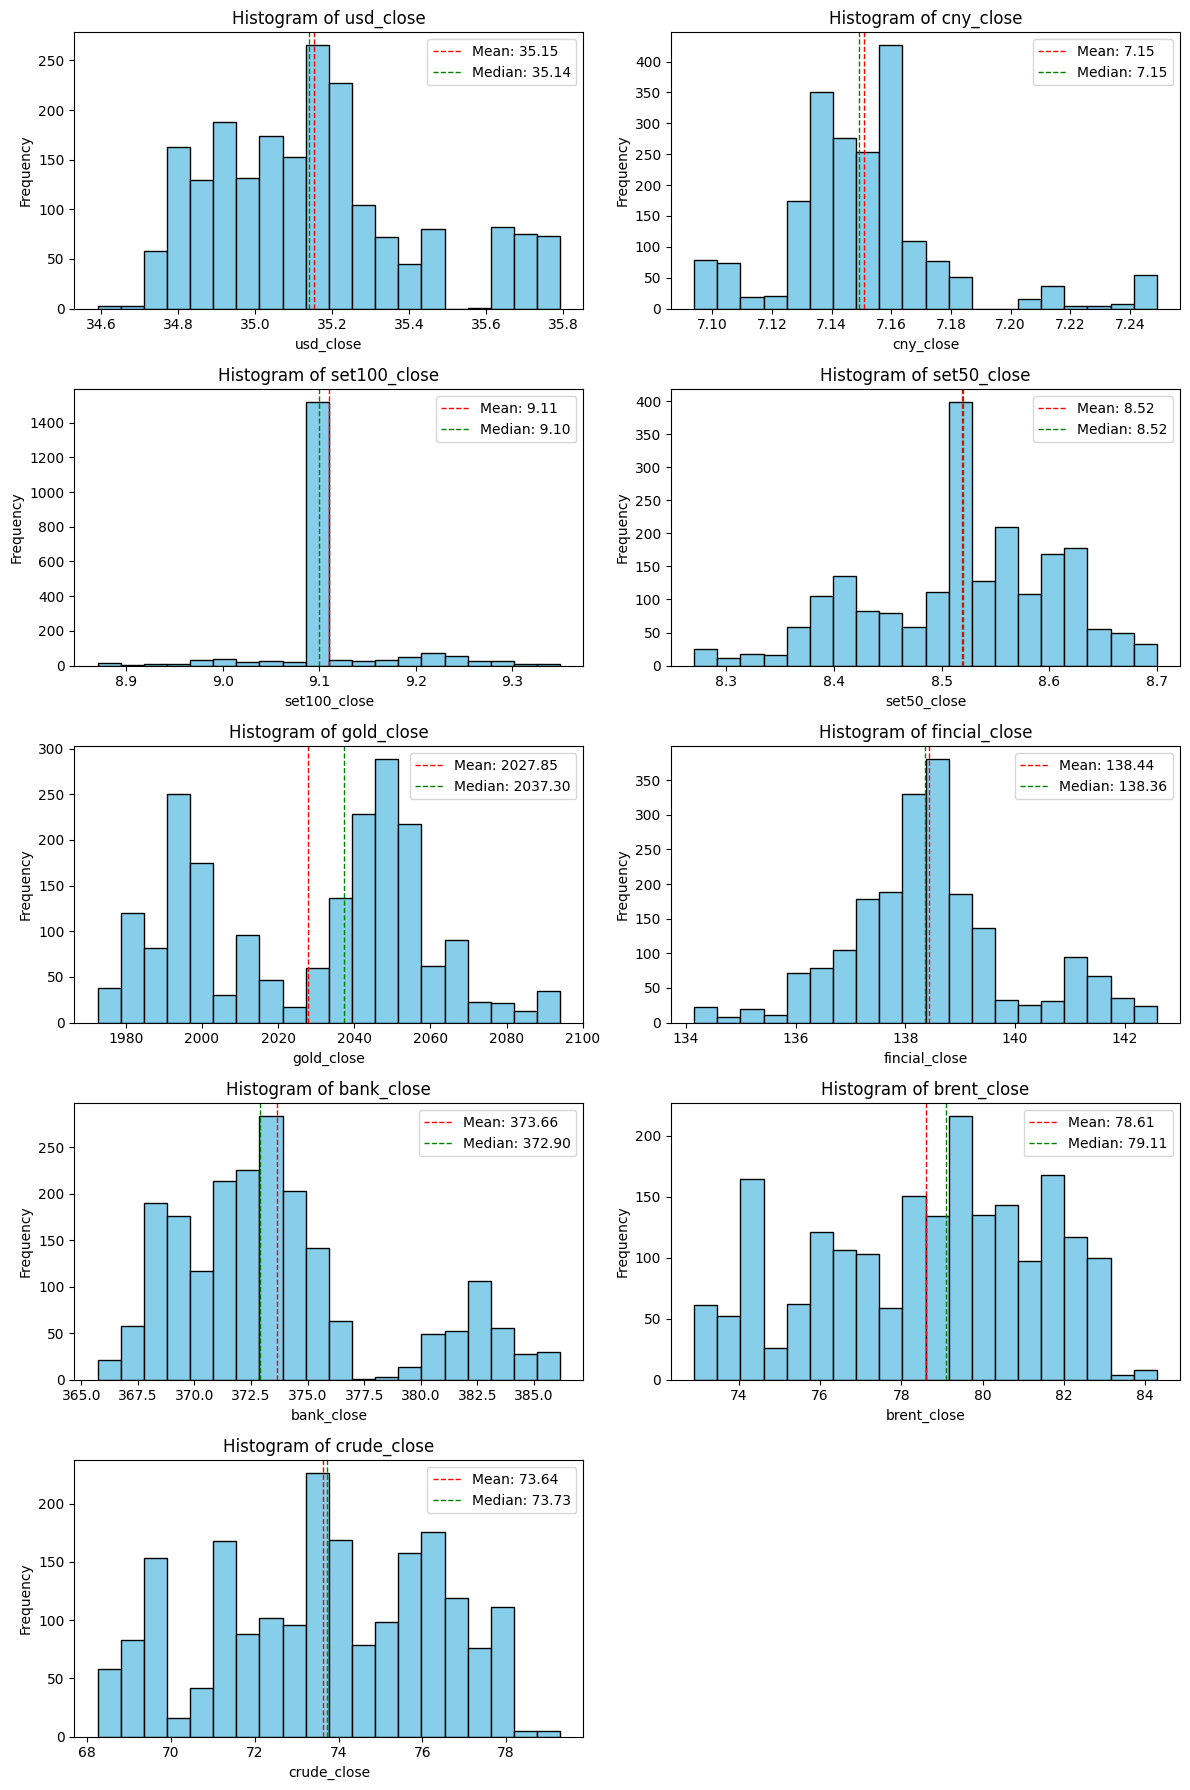

In [138]:
## Check Skewness
columns = ['usd_close', 'cny_close', 'set100_close', 'set50_close',
           'gold_close', 'fincial_close', 'bank_close', 'brent_close', 'crude_close']

fig, axs = plt.subplots(5, 2, figsize=(12, 18))

# Flatten the 2D array of axes to simplify indexing
axs = axs.flatten()

for i, column in enumerate(columns):
    axs[i].hist(tisco_merged[column], bins=20, color='skyblue', edgecolor='black')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Frequency')
    axs[i].set_title(f'Histogram of {column}')

    mean_val = tisco_merged[column].mean()
    median_val = tisco_merged[column].median()

    axs[i].axvline(mean_val, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_val:.2f}')
    axs[i].axvline(median_val, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_val:.2f}')
    axs[i].legend()

# Hide any unused subplots
for i in range(len(columns), len(axs)):
    axs[i].axis('off')

plt.tight_layout()
plt.show()

In [139]:
## Check Normality

for column_name in columns:
    df_tmp = tisco_merged[[column_name]].dropna()

    print(f'{column_name} : ', end='')

    # Perform Anderson-Darling test for normality
    statistic, critical_values, significance_levels = stats.anderson(df_tmp[column_name], dist='norm')
    print(f'Statistic: {statistic:.3f}, \nCritical Values: {critical_values}, \nSignificance Levels: {significance_levels}')

    # Check normality based on the 5% significance level
    if statistic >= critical_values[2]:
        print('## Not normal ##')
    else:
        print('# Normal #')

    print('==========================================')

usd_close : Statistic: 32.883, 
Critical Values: [0.575 0.655 0.785 0.916 1.09 ], 
Significance Levels: [15.  10.   5.   2.5  1. ]
## Not normal ##
cny_close : Statistic: 53.659, 
Critical Values: [0.575 0.655 0.785 0.916 1.09 ], 
Significance Levels: [15.  10.   5.   2.5  1. ]
## Not normal ##
set100_close : Statistic: 333.004, 
Critical Values: [0.575 0.655 0.785 0.916 1.09 ], 
Significance Levels: [15.  10.   5.   2.5  1. ]
## Not normal ##
set50_close : Statistic: 20.150, 
Critical Values: [0.575 0.655 0.785 0.916 1.09 ], 
Significance Levels: [15.  10.   5.   2.5  1. ]
## Not normal ##
gold_close : Statistic: 60.053, 
Critical Values: [0.575 0.655 0.785 0.916 1.09 ], 
Significance Levels: [15.  10.   5.   2.5  1. ]
## Not normal ##
fincial_close : Statistic: 30.536, 
Critical Values: [0.575 0.655 0.785 0.916 1.09 ], 
Significance Levels: [15.  10.   5.   2.5  1. ]
## Not normal ##
bank_close : Statistic: 66.907, 
Critical Values: [0.575 0.655 0.785 0.916 1.09 ], 
Significance Leve

## Adding Technical Features

In [140]:
# Create a copy of the DataFrame to avoid modifying the original data
tisco_data = tisco_merged.copy()

# Adding Technical Features
tisco_data['ema'] = ta.trend.ema_indicator(close=tisco_data['tisco_close'], window=14)
tisco_data['rsi'] = ta.momentum.RSIIndicator(close=tisco_data['tisco_close'], window=14).rsi()
tisco_data['obv'] = ta.volume.OnBalanceVolumeIndicator(close=tisco_data['tisco_close'], volume=tisco_data['tisco_vol']).on_balance_volume()
tisco_data['bb_upper'], _, tisco_data['bb_lower'] = ta.volatility.bollinger_hband(close=tisco_data['tisco_close'], window=20), ta.volatility.bollinger_mavg(close=tisco_data['tisco_close'], window=20), ta.volatility.bollinger_lband(close=tisco_data['tisco_close'], window=20)

tisco_data.dropna(inplace = True)
tisco_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 19 to 2027
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype                       
---  ------         --------------  -----                       
 0   Datetime       2009 non-null   datetime64[ns, Asia/Bangkok]
 1   Signal         2009 non-null   int64                       
 2   tisco_close    2009 non-null   float64                     
 3   tisco_vol      2009 non-null   int64                       
 4   usd_close      2009 non-null   float64                     
 5   cny_close      2009 non-null   float64                     
 6   set100_close   2009 non-null   float64                     
 7   set50_close    2009 non-null   float64                     
 8   gold_close     2009 non-null   float64                     
 9   fincial_close  2009 non-null   float64                     
 10  bank_close     2009 non-null   float64                     
 11  brent_close    2009 non-null   float64    

In [141]:
tisco_corr = tisco_data.corr()['tisco_close']

print("Correlation with tisco15_close:")
print(tisco_corr)

print("\nInterpretation:")
for variable, correlation in tisco_corr.items():
    if correlation > 0.7 or correlation < -0.7:
        print(f"The correlation between 'tisco15_close' and '{variable}' is strong ({correlation:.2f})")
    elif 0.3 <= correlation <= 0.7 or -0.7 <= correlation <= -0.3:
        print(f"The correlation between 'tisco15_close' and '{variable}' is moderate ({correlation:.2f})")
    elif 0.1 <= correlation <= 0.3 or -0.3 <= correlation <= -0.1:
        print(f"The correlation between 'tisco15_close' and '{variable}' is weak ({correlation:.2f})")
    else:
        print(f"There is no significant correlation between 'tisco15_close' and '{variable}' ({correlation:.2f})")

Correlation with tisco15_close:
Signal          -0.076932
tisco_close      1.000000
tisco_vol        0.042159
usd_close       -0.287490
cny_close        0.101865
set100_close    -0.046993
set50_close      0.187795
gold_close       0.321008
fincial_close    0.662760
bank_close       0.780122
brent_close      0.147512
crude_close     -0.083324
ema              0.989046
rsi              0.240452
obv              0.798350
bb_upper         0.976020
bb_lower         0.975198
Name: tisco_close, dtype: float64

Interpretation:
There is no significant correlation between 'tisco15_close' and 'Signal' (-0.08)
The correlation between 'tisco15_close' and 'tisco_close' is strong (1.00)
There is no significant correlation between 'tisco15_close' and 'tisco_vol' (0.04)
The correlation between 'tisco15_close' and 'usd_close' is weak (-0.29)
The correlation between 'tisco15_close' and 'cny_close' is weak (0.10)
There is no significant correlation between 'tisco15_close' and 'set100_close' (-0.05)
The co

<ipython-input-141-d1e1605511fa>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  tisco_corr = tisco_data.corr()['tisco_close']


<ipython-input-142-0d349d8f787c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(tisco_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)


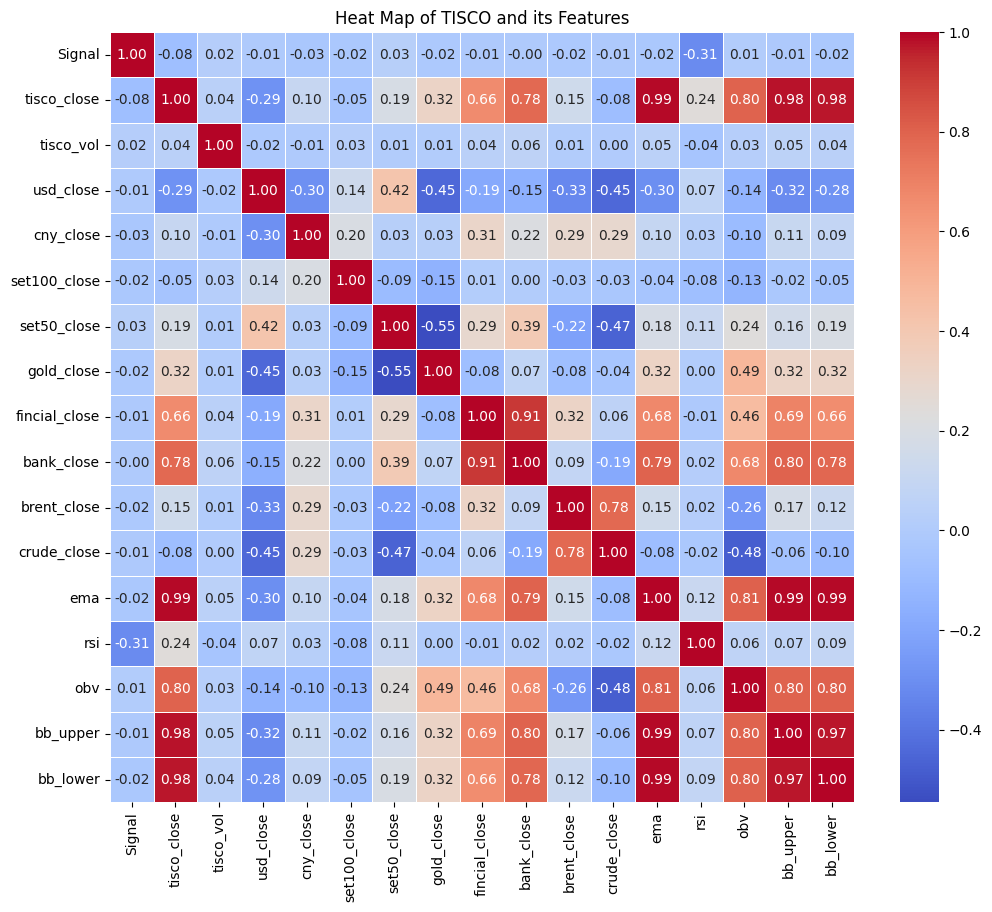

In [142]:
plt.figure(figsize=(12, 10))
sns.heatmap(tisco_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Heat Map of TISCO and its Features')

plt.show()

In [143]:
tisco_matrix = tisco_data.corr(numeric_only=True)

# Set correlation threshold values
strong_corr_threshold = 0.5
moderate_corr_threshold_low = 0.3
moderate_corr_threshold_high = 0.5

# Select features with strong correlation
strong_corr_features = tisco_matrix[tisco_matrix['tisco_close'].abs() >= strong_corr_threshold].index.tolist()

# Select features with moderate correlation
moderate_corr_features = tisco_matrix[(tisco_matrix['tisco_close'].abs() >= moderate_corr_threshold_low) &
                                 (tisco_matrix['tisco_close'].abs() < moderate_corr_threshold_high)].index.tolist()

# Combine the selected features
selected_features = strong_corr_features + moderate_corr_features

# Display the names of the selected features
print("Selected Feature Names:")
print(selected_features)


Selected Feature Names:
['tisco_close', 'fincial_close', 'bank_close', 'ema', 'obv', 'bb_upper', 'bb_lower', 'gold_close']


In [144]:
tisco_features = ['tisco_close', 'fincial_close', 'bank_close', 'ema', 'obv', 'bb_upper', 'bb_lower', 'gold_close', 'rsi']
for column in tisco_features:
    median_value = tisco_data[column].median()
    tisco_data[column].fillna(median_value, inplace=True)

## Normalization

In [145]:
tisco_features = ['tisco_close', 'fincial_close', 'bank_close', 'ema', 'obv', 'bb_upper', 'bb_lower', 'gold_close', 'rsi']

# Create a MinMaxScaler instance
tisco_scaler = MinMaxScaler()

# Fit the scaler to the data and transform the specified columns
tisco_data[tisco_features] = tisco_scaler.fit_transform(tisco_data[tisco_features])

In [146]:
tisco_data[tisco_features]

,tisco_close,fincial_close,bank_close,ema,obv,bb_upper,bb_lower,gold_close,rsi
19,0.0625,0.531991,0.320449,0.033673,0.000000,0.035565,0.067168,0.129219,0.511311
20,0.0625,0.547394,0.333170,0.034222,0.000034,0.035565,0.067168,0.106173,0.511311
21,0.0625,0.523698,0.298923,0.034698,0.000243,0.035565,0.067168,0.091358,0.511311
22,0.0625,0.545024,0.354207,0.035111,0.000333,0.035565,0.067168,0.091358,0.511311
23,0.0625,0.569907,0.356164,0.035469,0.000548,0.026237,0.070733,0.102881,0.511311
...,...,...,...,...,...,...,...,...,...
2023,1.0000,0.559242,0.493640,0.992435,0.983790,0.960431,0.941573,0.782715,0.615592
2024,1.0000,0.561612,0.499022,0.995325,0.984361,0.961958,0.953188,0.798354,0.615592
2025,1.0000,0.555687,0.505381,0.997829,0.998402,0.961898,0.966538,0.790946,0.615592
2026,1.0000,0.553319,0.495597,1.000000,1.000000,0.959953,0.981952,0.796706,0.615592


In [147]:
tisco_data.dtypes

Datetime         datetime64[ns, Asia/Bangkok]
Signal                                  int64
tisco_close                           float64
tisco_vol                               int64
usd_close                             float64
cny_close                             float64
set100_close                          float64
set50_close                           float64
gold_close                            float64
fincial_close                         float64
bank_close                            float64
brent_close                           float64
crude_close                           float64
ema                                   float64
rsi                                   float64
obv                                   float64
bb_upper                              float64
bb_lower                              float64
dtype: object

## Model Development

### Training

In [148]:
X_train_df = tisco_data[tisco_features]
y_train_df = tisco_data['Signal']

#### Split Data

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X_train_df, y_train_df, test_size=0.2, random_state=123, stratify=y_train_df)

# Set parameter
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

k = 10
auc_scorer = make_scorer(roc_auc_score, greater_is_better = True, average= 'macro',multi_class='ovr',needs_proba=True)

### 1. Logistic Regression

In [150]:
lgr = LogisticRegression(solver='liblinear')
param_grid_lgr = {'C': np.logspace(-4, 4, 20), 'penalty': ['l1', 'l2']}
tisco_grid_search_lgr = GridSearchCV(estimator=lgr, param_grid=param_grid_lgr, cv=k, scoring='roc_auc', return_train_score=False, verbose=1)
tisco_grid_search_lgr.fit(X_train, y_train)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

GridSearchCV(cv=10, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

In [151]:
tisco_grid_search_lgr.best_params_

{'C': 10000.0, 'penalty': 'l1'}

In [152]:
y_prob_lgr = tisco_grid_search_lgr.predict_proba(X_test)
y_pred_lgr = tisco_grid_search_lgr.predict(X_test)

# Convert y_test to a 1D array if it's not already
y_test_1d = y_test.ravel()

# Confusion Matrix
conf_matrix_lgr = confusion_matrix(y_test_1d, y_pred_lgr)

# AUC Score
auc_lgr = roc_auc_score(y_test_1d, y_prob_lgr[:, 1]) * 100  # Assuming binary classification, adjust if needed

# Print Confusion Matrix and AUC Score
print("\nLogistic Regression Confusion Matrix:")
print(conf_matrix_lgr)
print(f"Logistic Regression AUC Score: {auc_lgr:.2f}%")


Logistic Regression Confusion Matrix:
[[315  13]
 [ 66   8]]
Logistic Regression AUC Score: 81.00%


In [154]:
# Check overfitting or underfitting using ROC-AUC
y_train_prob = tisco_grid_search_lgr.predict_proba(X_train)[:, 1]
y_test_prob = tisco_grid_search_lgr.predict_proba(X_test)[:, 1]

# Calculate ROC-AUC on training and test sets
train_roc_auc = roc_auc_score(y_train, y_train_prob)
test_roc_auc = roc_auc_score(y_test, y_test_prob)

# Compare the ROC-AUC metrics to diagnose overfitting or underfitting
if train_roc_auc - test_roc_auc > 0.025:
    print("The model may be overfitting.")
elif train_roc_auc < 0.5 and test_roc_auc < 0.5:
    print("The model may be underfitting.")
else:
    print("The model performance is balanced.")

The model performance is balanced.


In [288]:
train_y_prob_lgr = tisco_grid_search_lgr.predict_proba(X_train)
train_auc_lgr = roc_auc_score(y_train.ravel(), train_y_prob_lgr[:, 1]) * 100

print(f"Train AUC Score: {train_auc_lgr:.2f}%")
print(f"Test AUC Score: {auc_lgr:.2f}%")

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- bb_medium
- cny_close
- erw_close
- resource_close
Feature names seen at fit time, yet now missing:
- bank_close
- fincial_close
- tisco_close


### 2. Extreme Gradient Boosting (XGBoost)

In [156]:
xgb_classifier = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
param_grid_xgb = {'n_estimators': [100, 200, 300], 'max_depth': [3, 4, 5], 'learning_rate': [0.1, 0.01, 0.001]}
grid_search_xgb = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid_xgb, cv=k, scoring='roc_auc', return_train_score=False, verbose=1)
grid_search_xgb.fit(X_train, pd.DataFrame(y_train))

Fitting 10 folds for each of 27 candidates, totalling 270 fits


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='roc_auc', verbose=1)

In [157]:
y_prob_xgb = grid_search_xgb.predict_proba(X_test)
y_pred_xgb = grid_search_xgb.predict(X_test)

# Convert y_test to a 1D array if it's not already
y_test_1d = y_test.ravel()

# Confusion Matrix
conf_matrix_xgb = confusion_matrix(y_test_1d, y_pred_xgb)

# AUC Score
auc_xgb = roc_auc_score(y_test_1d, y_prob_xgb[:, 1]) * 100  # Assuming binary classification, adjust if needed

# Print Confusion Matrix and AUC Score
print("\nExtreme Gradient Boosting (XGBoost) Confusion Matrix:")
print(conf_matrix_xgb)
print(f"Extreme Gradient Boosting (XGBoost) AUC Score: {auc_xgb:.2f}%")


Extreme Gradient Boosting (XGBoost) Confusion Matrix:
[[319   9]
 [ 68   6]]
Extreme Gradient Boosting (XGBoost) AUC Score: 79.84%


In [158]:
# Check overfitting or underfitting using ROC-AUC
y_train_prob = grid_search_xgb.predict_proba(X_train)[:, 1]
y_test_prob = grid_search_xgb.predict_proba(X_test)[:, 1]

# Calculate ROC-AUC on training and test sets
train_roc_auc = roc_auc_score(y_train, y_train_prob)
test_roc_auc = roc_auc_score(y_test, y_test_prob)

# Compare the ROC-AUC metrics to diagnose overfitting or underfitting
if train_roc_auc - test_roc_auc > 0.025:
    print("The model may be overfitting.")
elif train_roc_auc < 0.5 and test_roc_auc < 0.5:
    print("The model may be underfitting.")
else:
    print("The model performance is balanced.")

The model may be overfitting.


In [159]:
train_y_prob_xgb = grid_search_xgb.predict_proba(X_train)
train_auc_xgb = roc_auc_score(y_train.ravel(), train_y_prob_xgb[:, 1]) * 100

print(f"Train AUC Score: {train_auc_xgb:.2f}%")
print(f"Test AUC Score: {auc_xgb:.2f}%")

Train AUC Score: 88.77%
Test AUC Score: 79.84%


### 3. SVM Support Vector Machine (SVM)

In [160]:
svm = SVC(probability=True)
param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svm, cv=k, scoring='roc_auc', return_train_score=False, verbose=1)
grid_search_svm.fit(X_train, y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


GridSearchCV(cv=10, estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
             scoring='roc_auc', verbose=1)

In [161]:
y_prob_svm = grid_search_svm.predict_proba(X_test)
y_pred_svm = grid_search_svm.predict(X_test)

# Convert y_test to a 1D array if it's not already
y_test_1d = y_test.ravel()

# Confusion Matrix
conf_matrix_svm = confusion_matrix(y_test_1d, y_pred_svm)

# AUC Score
auc_svm = roc_auc_score(y_test_1d, y_prob_svm[:, 1]) * 100  # Assuming binary classification, adjust if needed

# Print Confusion Matrix and AUC Score
print("\nSVM Support Vector Machine (SVM) Confusion Matrix:")
print(conf_matrix_svm)
print(f"SVM Support Vector Machine (SVM) AUC Score: {auc_svm:.2f}%")


SVM Support Vector Machine (SVM) Confusion Matrix:
[[325   3]
 [ 68   6]]
SVM Support Vector Machine (SVM) AUC Score: 77.77%


In [162]:
# Check overfitting or underfitting using ROC-AUC
y_train_prob = grid_search_svm.predict_proba(X_train)[:, 1]
y_test_prob = grid_search_svm.predict_proba(X_test)[:, 1]

# Calculate ROC-AUC on training and test sets
train_roc_auc = roc_auc_score(y_train, y_train_prob)
test_roc_auc = roc_auc_score(y_test, y_test_prob)

# Compare the ROC-AUC metrics to diagnose overfitting or underfitting
if train_roc_auc - test_roc_auc > 0.025:
    print("The model may be overfitting.")
elif train_roc_auc < 0.5 and test_roc_auc < 0.5:
    print("The model may be underfitting.")
else:
    print("The model performance is balanced.")

The model may be overfitting.


In [163]:
train_y_prob_svm = grid_search_svm.predict_proba(X_train)
train_auc_svm = roc_auc_score(y_train.ravel(), train_y_prob_svm[:, 1]) * 100

print(f"Train AUC Score: {train_auc_svm:.2f}%")
print(f"Test AUC Score: {auc_svm:.2f}%")

Train AUC Score: 81.00%
Test AUC Score: 77.77%


### 4. Random forest

In [164]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
param_grid_rf = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=k, scoring='roc_auc', return_train_score=False, verbose=1)
grid_search_rf.fit(X_train, y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='roc_auc', verbose=1)

In [165]:
y_prob_rf = grid_search_rf.predict_proba(X_test)
y_pred_rf = grid_search_rf.predict(X_test)

# Convert y_test to a 1D array if it's not already
y_test_1d = y_test.ravel()

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test_1d, y_pred_rf)

# AUC Score
auc_rf = roc_auc_score(y_test_1d, y_prob_rf[:, 1]) * 100  # Assuming binary classification, adjust if needed

# Print Confusion Matrix and AUC Score
print("\nRandom forest Confusion Matrix:")
print(conf_matrix_rf)
print(f"Random forest AUC Score: {auc_rf:.2f}%")


Random forest Confusion Matrix:
[[311  17]
 [ 60  14]]
Random forest AUC Score: 82.12%


In [166]:
# Check overfitting or underfitting using ROC-AUC
y_train_prob = grid_search_rf.predict_proba(X_train)[:, 1]
y_test_prob = grid_search_rf.predict_proba(X_test)[:, 1]

# Calculate ROC-AUC on training and test sets
train_roc_auc = roc_auc_score(y_train, y_train_prob)
test_roc_auc = roc_auc_score(y_test, y_test_prob)

# Compare the ROC-AUC metrics to diagnose overfitting or underfitting
if train_roc_auc - test_roc_auc > 0.025:
    print("The model may be overfitting.")
elif train_roc_auc < 0.5 and test_roc_auc < 0.5:
    print("The model may be underfitting.")
else:
    print("The model performance is balanced.")

The model may be overfitting.


In [167]:
train_y_prob_rf = grid_search_rf.predict_proba(X_train)
train_auc_rf = roc_auc_score(y_train.ravel(), train_y_prob_rf[:, 1]) * 100

print(f"Train AUC Score: {train_auc_rf:.2f}%")
print(f"Test AUC Score: {auc_rf:.2f}%")

Train AUC Score: 98.17%
Test AUC Score: 82.12%


### 5. Decision tree

In [168]:
dt = DecisionTreeClassifier(random_state=42)
param_grid_dt = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=k, scoring='roc_auc', return_train_score=False, verbose=1)
grid_search_dt.fit(X_train, y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='roc_auc', verbose=1)

In [169]:
y_prob_dt = grid_search_dt.predict_proba(X_test)
y_pred_dt = grid_search_dt.predict(X_test)

# Convert y_test to a 1D array if it's not already
y_test_1d = y_test.ravel()

# Confusion Matrix
conf_matrix_dt = confusion_matrix(y_test_1d, y_pred_dt)

# AUC Score
auc_dt = roc_auc_score(y_test_1d, y_prob_dt[:, 1]) * 100  # Assuming binary classification, adjust if needed

# Print Confusion Matrix and AUC Score
print("\nDecision tree Confusion Matrix:")
print(conf_matrix_dt)
print(f"Decision tree AUC Score: {auc_dt:.2f}%")


Decision tree Confusion Matrix:
[[296  32]
 [ 51  23]]
Decision tree AUC Score: 71.47%


In [170]:
# Check overfitting or underfitting using ROC-AUC
y_train_prob = grid_search_dt.predict_proba(X_train)[:, 1]
y_test_prob = grid_search_dt.predict_proba(X_test)[:, 1]

# Calculate ROC-AUC on training and test sets
train_roc_auc = roc_auc_score(y_train, y_train_prob)
test_roc_auc = roc_auc_score(y_test, y_test_prob)

# Compare the ROC-AUC metrics to diagnose overfitting or underfitting
if train_roc_auc - test_roc_auc > 0.025:
    print("The model may be overfitting.")
elif train_roc_auc < 0.5 and test_roc_auc < 0.5:
    print("The model may be underfitting.")
else:
    print("The model performance is balanced.")

The model may be overfitting.


In [171]:
train_y_prob_dt = grid_search_dt.predict_proba(X_train)
train_auc_dt = roc_auc_score(y_train.ravel(), train_y_prob_dt[:, 1]) * 100

print(f"Train AUC Score: {train_auc_dt:.2f}%")
print(f"Test AUC Score: {auc_dt:.2f}%")

Train AUC Score: 94.60%
Test AUC Score: 71.47%


### 6. Gaussian Naive Bayes

In [172]:
gnb = GaussianNB()
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}
grid_search_gnb = GridSearchCV(GaussianNB(), param_grid, cv=k)
grid_search_gnb.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]})

In [173]:
y_prob_gnb = grid_search_gnb.predict_proba(X_test)
y_pred_gnb = grid_search_gnb.predict(X_test)

# Convert y_test to a 1D array if it's not already
y_test_1d = y_test.ravel()

# Confusion Matrix
conf_matrix_gnb = confusion_matrix(y_test_1d, y_pred_gnb)

# AUC Score
auc_gnb = roc_auc_score(y_test_1d, y_prob_gnb[:, 1]) * 100  # Assuming binary classification, adjust if needed

# Print Confusion Matrix and AUC Score
print("\n6.Gaussian Naive Bayes Confusion Matrix:")
print(conf_matrix_gnb)
print(f"6.Gaussian Naive Bayes AUC Score: {auc_gnb:.2f}%")


6.Gaussian Naive Bayes Confusion Matrix:
[[320   8]
 [ 66   8]]
6.Gaussian Naive Bayes AUC Score: 73.50%


In [174]:
# Check overfitting or underfitting using ROC-AUC
y_train_prob = grid_search_gnb.predict_proba(X_train)[:, 1]
y_test_prob = grid_search_gnb.predict_proba(X_test)[:, 1]

# Calculate ROC-AUC on training and test sets
train_roc_auc = roc_auc_score(y_train, y_train_prob)
test_roc_auc = roc_auc_score(y_test, y_test_prob)

# Compare the ROC-AUC metrics to diagnose overfitting or underfitting
if train_roc_auc - test_roc_auc > 0.025:
    print("The model may be overfitting.")
elif train_roc_auc < 0.5 and test_roc_auc < 0.5:
    print("The model may be underfitting.")
else:
    print("The model performance is balanced.")

The model performance is balanced.


In [175]:
train_y_prob_gnb = grid_search_gnb.predict_proba(X_train)
train_auc_gnb = roc_auc_score(y_train.ravel(), train_y_prob_gnb[:, 1]) * 100

print(f"Train AUC Score: {train_auc_gnb:.2f}%")
print(f"Test AUC Score: {auc_gnb:.2f}%")

Train AUC Score: 71.40%
Test AUC Score: 73.50%


### Summary score (TISCO)

In [176]:
print(f"Logistic regression RUC_AUC Score: {auc_lgr:.2f}%", end='\n\n')
print(f"Extreme Gradient Boosting (XGBoost) regression RUC_AUC Score: {auc_xgb:.2f}%", end='\n\n')
print(f"SVM Support Vector Machine (SVM) regression RUC_AUC Score: {auc_svm:.2f}%", end='\n\n')
print(f"Random forest regression RUC_AUCScore: {auc_rf:.2f}%", end='\n\n')
print(f"Decision tree regression RUC_AUC Score: {auc_dt:.2f}%", end='\n\n')
print(f"Gaussian Naive Bayes regression RUC_AUC Score: {auc_gnb:.2f}%", end='\n\n')

Logistic regression RUC_AUC Score: 81.00%

Extreme Gradient Boosting (XGBoost) regression RUC_AUC Score: 79.84%

SVM Support Vector Machine (SVM) regression RUC_AUC Score: 77.77%

Random forest regression RUC_AUCScore: 82.12%

Decision tree regression RUC_AUC Score: 71.47%

Gaussian Naive Bayes regression RUC_AUC Score: 73.50%



## Model Selection

Select the Logistic Regression Model

In [177]:
# Normalization
tisco_features = ['tisco_close', 'fincial_close', 'bank_close', 'ema', 'obv', 'bb_upper', 'bb_lower', 'gold_close', 'rsi']

tisco_scaler = MinMaxScaler()
tisco_data[tisco_features] = tisco_scaler.fit_transform(tisco_data[tisco_features])

In [178]:
tisco_data.dtypes

Datetime         datetime64[ns, Asia/Bangkok]
Signal                                  int64
tisco_close                           float64
tisco_vol                               int64
usd_close                             float64
cny_close                             float64
set100_close                          float64
set50_close                           float64
gold_close                            float64
fincial_close                         float64
bank_close                            float64
brent_close                           float64
crude_close                           float64
ema                                   float64
rsi                                   float64
obv                                   float64
bb_upper                              float64
bb_lower                              float64
dtype: object

In [179]:
# Save tisco_scaler
directory = "/content/save_model"
if not os.path.exists(directory):
    os.makedirs(directory)

# Specify the full path for saving the model
tisco_scaler_file_path = os.path.join(directory, "tisco_scaler.pkl")

# Save the model
joblib.dump(tisco_scaler, tisco_scaler_file_path)

['/content/save_model/tisco_scaler.pkl']

In [180]:
tisco_x_df = tisco_data[tisco_features]
tisco_y_df = tisco_data['Signal']

In [181]:
X_train = tisco_x_df
y_train = tisco_y_df.values.ravel()

# Hyperparameter
k = 10
auc_scorer = make_scorer(roc_auc_score, greater_is_better=True, average='macro', multi_class='ovr', needs_proba=True)
lgr = LogisticRegression(solver='liblinear')
param_grid_lgr = {'C': [10000.0], 'penalty': ['l2']}

# Machine Learning Model
tisco_final_model = LogisticRegression(solver='liblinear', C = 10000.0, penalty = 'l2', verbose = 1)
tisco_final_model.fit(X_train, y_train)

[LibLinear]

LogisticRegression(C=10000.0, solver='liblinear', verbose=1)

In [182]:
y_test_pred = tisco_final_model.predict(X_test)
# Print the classification report
print(classification_report(y_test, y_test_pred))

# y_predict = tisco_final_model.predict_proba(X_df)[:,1]
# test_auc = roc_auc_score(y_df, y_predict)

test_auc = roc_auc_score(y_test_1d, y_prob_lgr[:, 1]) * 100

# Print the scores
print(f"AUC Score: {test_auc:.4f}")

              precision    recall  f1-score   support

           0       0.83      0.96      0.89       328
           1       0.43      0.12      0.19        74

    accuracy                           0.81       402
   macro avg       0.63      0.54      0.54       402
weighted avg       0.76      0.81      0.76       402

AUC Score: 80.9987


In [183]:
# Save TISCO_Model
directory = "/content/save_model"
if not os.path.exists(directory):
    os.makedirs(directory)

# Specify the full path for saving the model
tisco_model_file_path = os.path.join(directory, "tisco_final_model.pkl")

# Save the model
joblib.dump(tisco_final_model, tisco_model_file_path)

['/content/save_model/tisco_final_model.pkl']

# SPRC Model

## Define Variables

In [184]:
## Set Y
sprc['Close_Shift'] = sprc['Close'].shift(-1)
sprc['Close_Shift'] = sprc['Close_Shift'].fillna(method='ffill')

## Set Y Condition
sprc['Signal'] = np.where(sprc['Close_Shift'] > sprc['Close'], 1, 0)

In [185]:
# Set Variables
# Set Y
sprc_signal = sprc['Signal']

# Reference date
ref_date = sprc['Datetime']

In [186]:
# Create DataFrames for each variable
sprc_df = pd.DataFrame({'Datetime': sprc['Datetime'], 'Signal': sprc['Signal'], 'sprc_close': sprc['Close'], 'sprc_vol': sprc['Volume']})
usd_df = pd.DataFrame({'Datetime': ref_date, 'usd_close': usd})
cny_df = pd.DataFrame({'Datetime': ref_date, 'cny_close': cny})
set100_df = pd.DataFrame({'Datetime': ref_date, 'set100_close': set100})
set50_df = pd.DataFrame({'Datetime': ref_date, 'set50_close': set50})
gold_df = pd.DataFrame({'Datetime': ref_date, 'gold_close': gold})
resource_df = pd.DataFrame({'Datetime': ref_date, 'resource_close': resource})
energy_df = pd.DataFrame({'Datetime': ref_date, 'energy_close': energy})
brent_df = pd.DataFrame({'Datetime': ref_date, 'brent_close': brent})
crude_df = pd.DataFrame({'Datetime': ref_date, 'crude_close': crude})
irpc_df = pd.DataFrame({'Datetime': ref_date, 'irpc_close': irpc})
top_df = pd.DataFrame({'Datetime': ref_date, 'top_close': top})
bcp_df = pd.DataFrame({'Datetime': ref_date, 'bcp_close': bcp})

fin_df = pd.DataFrame({'Datetime': ref_date, 'fincial_close': fin})
bank_df = pd.DataFrame({'Datetime': ref_date, 'bank_close': bank})

# Merge all DataFrames on the 'Datetime' column
sprc_merged = pd.merge(sprc_df, usd_df, on='Datetime', how='left')
sprc_merged = pd.merge(sprc_merged, cny_df, on='Datetime', how='left')
sprc_merged = pd.merge(sprc_merged, set100_df, on='Datetime', how='left')
sprc_merged = pd.merge(sprc_merged, set50_df, on='Datetime', how='left')
sprc_merged = pd.merge(sprc_merged, gold_df, on='Datetime', how='left')
sprc_merged = pd.merge(sprc_merged, resource_df, on='Datetime', how='left')
sprc_merged = pd.merge(sprc_merged, energy_df, on='Datetime', how='left')
sprc_merged = pd.merge(sprc_merged, brent_df, on='Datetime', how='left')
sprc_merged = pd.merge(sprc_merged, crude_df, on='Datetime', how='left')
sprc_merged = pd.merge(sprc_merged, irpc_df, on='Datetime', how='left')
sprc_merged = pd.merge(sprc_merged, top_df, on='Datetime', how='left')
sprc_merged = pd.merge(sprc_merged, bcp_df, on='Datetime', how='left')

sprc_merged = pd.merge(sprc_merged, fin_df, on='Datetime', how='left')
sprc_merged = pd.merge(sprc_merged, bank_df, on='Datetime', how='left')


# Display the merged DataFrame
print(sprc_merged)

                      Datetime  Signal  sprc_close  sprc_vol  usd_close  \
0    2023-11-16 10:00:00+07:00       1        8.05         0  35.450001   
1    2023-11-16 10:05:00+07:00       0        8.10      8700  35.459999   
2    2023-11-16 10:10:00+07:00       0        8.05    311200  35.470001   
3    2023-11-16 10:15:00+07:00       0        8.05   2713500  35.459999   
4    2023-11-16 10:20:00+07:00       1        8.05     49700  35.470001   
...                        ...     ...         ...       ...        ...   
1981 2024-01-12 16:05:00+07:00       0        8.35     62500  34.820000   
1982 2024-01-12 16:10:00+07:00       1        8.35    193700  34.810001   
1983 2024-01-12 16:15:00+07:00       0        8.40    185401  34.830002   
1984 2024-01-12 16:20:00+07:00       0        8.35    411800  34.831001   
1985 2024-01-12 16:25:00+07:00       0        8.35    350600  34.830002   

      cny_close  set100_close  set50_close   gold_close  resource_close  \
0        7.2474         

In [187]:
# Check Null values
nan_count = sprc_merged.isna().sum()
print("NaN (n) = 722:")
print(nan_count, '\n')

NaN (n) = 722:
Datetime             0
Signal               0
sprc_close           0
sprc_vol             0
usd_close            0
cny_close          174
set100_close      1440
set50_close        178
gold_close           0
resource_close       0
energy_close         0
brent_close          0
crude_close          0
irpc_close           0
top_close            0
bcp_close            0
fincial_close        0
bank_close           0
dtype: int64 



In [188]:
# Fill Null Values
sprc_merged.fillna(method = 'ffill', inplace = True)

In [189]:
# Check Null values after fill
nan_count = sprc_merged.isna().sum()
print("NaN (n) = 722:")
print(nan_count, '\n')

NaN (n) = 722:
Datetime          0
Signal            0
sprc_close        0
sprc_vol          0
usd_close         0
cny_close         0
set100_close      0
set50_close       0
gold_close        0
resource_close    0
energy_close      0
brent_close       0
crude_close       0
irpc_close        0
top_close         0
bcp_close         0
fincial_close     0
bank_close        0
dtype: int64 



## Check Normality & Skewness

In [190]:
column_names_list = list(sprc_merged.columns)
print(column_names_list)

['Datetime', 'Signal', 'sprc_close', 'sprc_vol', 'usd_close', 'cny_close', 'set100_close', 'set50_close', 'gold_close', 'resource_close', 'energy_close', 'brent_close', 'crude_close', 'irpc_close', 'top_close', 'bcp_close', 'fincial_close', 'bank_close']


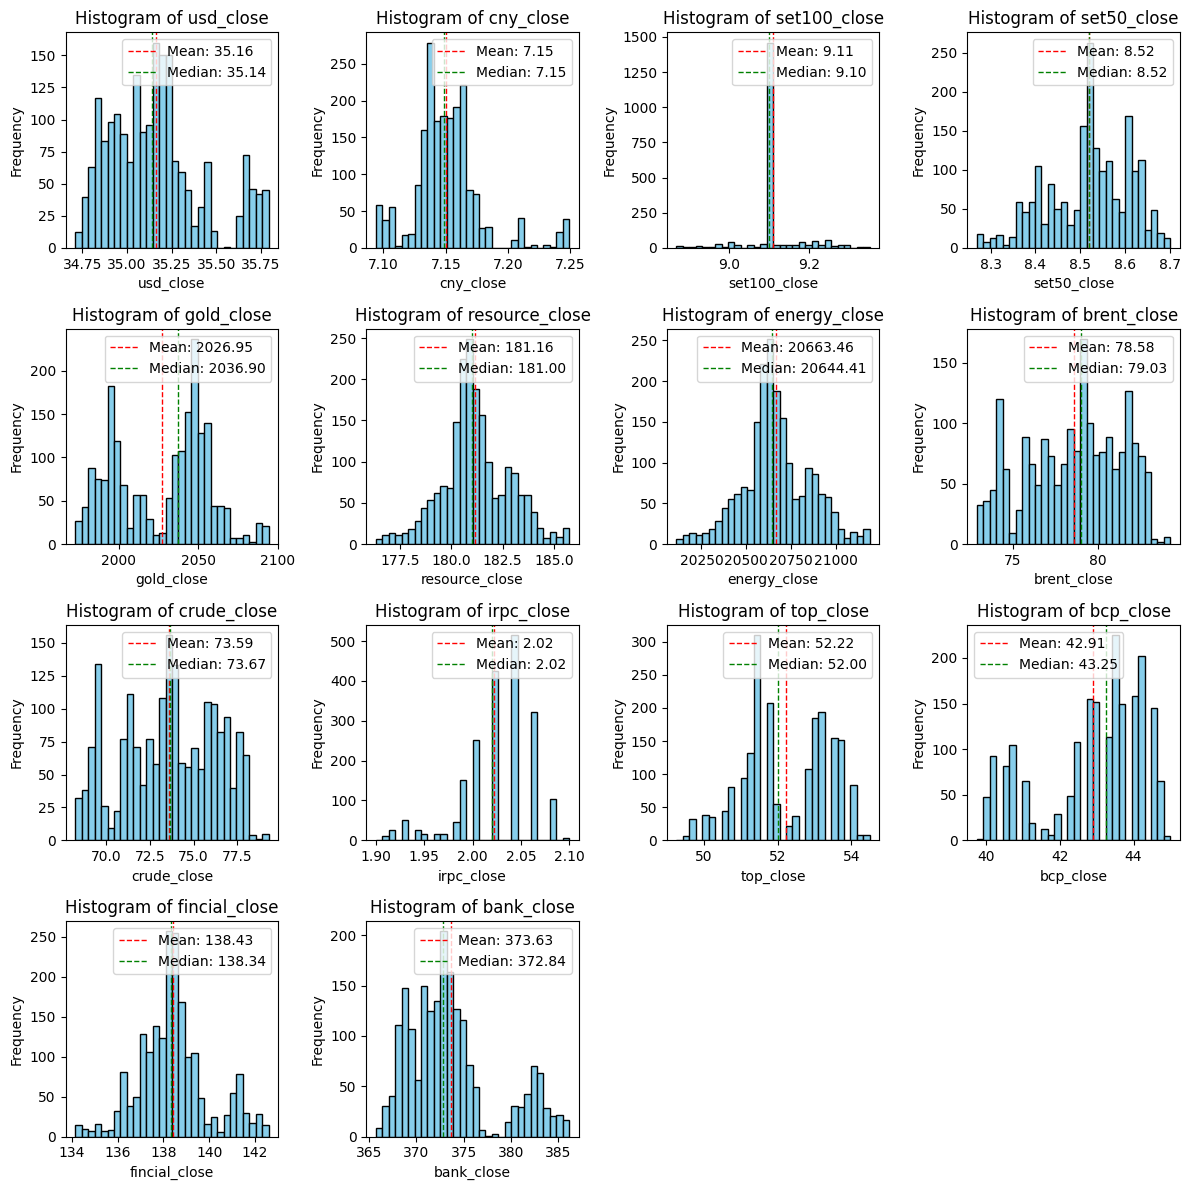

In [191]:
columns = ['usd_close', 'cny_close', 'set100_close', 'set50_close', 'gold_close', 'resource_close',
           'energy_close', 'brent_close', 'crude_close', 'irpc_close', 'top_close', 'bcp_close', 'fincial_close', 'bank_close']

fig, axs = plt.subplots(4, 4, figsize=(12, 12))

# Flatten the 2D array of axes to simplify indexing
axs = axs.flatten()

for i, column in enumerate(columns):
    axs[i].hist(sprc_merged[column], bins=30, color='skyblue', edgecolor='black')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Frequency')
    axs[i].set_title(f'Histogram of {column}')

    mean_val = sprc_merged[column].mean()
    median_val = sprc_merged[column].median()

    axs[i].axvline(mean_val, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_val:.2f}')
    axs[i].axvline(median_val, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_val:.2f}')
    axs[i].legend()

# Hide any unused subplots
for i in range(len(columns), len(axs)):
    axs[i].axis('off')

plt.tight_layout()
plt.show()


In [192]:
## Check Normality

for column_name in columns:
    df_tmp = sprc_merged[[column_name]].dropna()

    print(f'{column_name} : ', end='')

    # Perform Anderson-Darling test for normality
    statistic, critical_values, significance_levels = stats.anderson(df_tmp[column_name], dist='norm')
    print(f'Statistic: {statistic:.3f}, \nCritical Values: {critical_values}, \nSignificance Levels: {significance_levels}')

    # Check normality based on the 5% significance level
    if statistic >= critical_values[2]:
        print('## Not normal ##')
    else:
        print('# Normal #')

    print('==========================================')

usd_close : Statistic: 34.528, 
Critical Values: [0.575 0.655 0.785 0.916 1.09 ], 
Significance Levels: [15.  10.   5.   2.5  1. ]
## Not normal ##
cny_close : Statistic: 53.270, 
Critical Values: [0.575 0.655 0.785 0.916 1.09 ], 
Significance Levels: [15.  10.   5.   2.5  1. ]
## Not normal ##
set100_close : Statistic: 319.477, 
Critical Values: [0.575 0.655 0.785 0.916 1.09 ], 
Significance Levels: [15.  10.   5.   2.5  1. ]
## Not normal ##
set50_close : Statistic: 18.850, 
Critical Values: [0.575 0.655 0.785 0.916 1.09 ], 
Significance Levels: [15.  10.   5.   2.5  1. ]
## Not normal ##
gold_close : Statistic: 61.822, 
Critical Values: [0.575 0.655 0.785 0.916 1.09 ], 
Significance Levels: [15.  10.   5.   2.5  1. ]
## Not normal ##
resource_close : Statistic: 12.879, 
Critical Values: [0.575 0.655 0.785 0.916 1.09 ], 
Significance Levels: [15.  10.   5.   2.5  1. ]
## Not normal ##
energy_close : Statistic: 12.874, 
Critical Values: [0.575 0.655 0.785 0.916 1.09 ], 
Significance L

## Adding Technical Features

In [193]:
# Create a copy of the DataFrame to avoid modifying the original data
sprc_data = sprc_merged.copy()

# Adding Technical Features
sprc_data['ema'] = ta.trend.ema_indicator(close=sprc_data['sprc_close'], window=14)
sprc_data['rsi'] = ta.momentum.RSIIndicator(close=sprc_data['sprc_close'], window=14).rsi()
sprc_data['obv'] = ta.volume.OnBalanceVolumeIndicator(close=sprc_data['sprc_close'], volume=sprc_data['sprc_vol']).on_balance_volume()
sprc_data['bb_upper'], _, sprc_data['bb_lower'] = ta.volatility.bollinger_hband(close=sprc_data['sprc_close'], window=20), ta.volatility.bollinger_mavg(close=sprc_data['sprc_close'], window=20), ta.volatility.bollinger_lband(close=sprc_data['sprc_close'], window=20)

sprc_data.fillna(method = 'bfill', inplace = True)
sprc_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 1985
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype                       
---  ------          --------------  -----                       
 0   Datetime        1986 non-null   datetime64[ns, Asia/Bangkok]
 1   Signal          1986 non-null   int64                       
 2   sprc_close      1986 non-null   float64                     
 3   sprc_vol        1986 non-null   int64                       
 4   usd_close       1986 non-null   float64                     
 5   cny_close       1986 non-null   float64                     
 6   set100_close    1986 non-null   float64                     
 7   set50_close     1986 non-null   float64                     
 8   gold_close      1986 non-null   float64                     
 9   resource_close  1986 non-null   float64                     
 10  energy_close    1986 non-null   float64                     
 11  brent_close     1986 non-null 

In [194]:
sprc_data.isnull().sum()

Datetime          0
Signal            0
sprc_close        0
sprc_vol          0
usd_close         0
cny_close         0
set100_close      0
set50_close       0
gold_close        0
resource_close    0
energy_close      0
brent_close       0
crude_close       0
irpc_close        0
top_close         0
bcp_close         0
fincial_close     0
bank_close        0
ema               0
rsi               0
obv               0
bb_upper          0
bb_lower          0
dtype: int64

In [195]:
sprc_corr = sprc_data.corr()['sprc_close']

print("Correlation with sprc15_close:")
print(sprc_corr)

print("\nInterpretation:")
for variable, correlation in sprc_corr.items():
    if correlation > 0.7 or correlation < -0.7:
        print(f"The correlation between 'sprc5_close' and '{variable}' is strong ({correlation:.2f})")
    elif 0.3 <= correlation <= 0.7 or -0.7 <= correlation <= -0.3:
        print(f"The correlation between 'sprc15_close' and '{variable}' is moderate ({correlation:.2f})")
    elif 0.1 <= correlation <= 0.3 or -0.3 <= correlation <= -0.1:
        print(f"The correlation between 'sprc15_close' and '{variable}' is weak ({correlation:.2f})")
    else:
        print(f"There is no significant correlation between 'sprc15_close' and '{variable}' ({correlation:.2f})")

Correlation with sprc15_close:
Signal           -0.022339
sprc_close        1.000000
sprc_vol          0.047109
usd_close         0.176158
cny_close        -0.058721
set100_close     -0.119469
set50_close       0.557384
gold_close       -0.239775
resource_close    0.327587
energy_close      0.327649
brent_close       0.143769
crude_close      -0.231590
irpc_close        0.602811
top_close         0.653906
bcp_close        -0.277459
fincial_close     0.717168
bank_close        0.722618
ema               0.983391
rsi               0.240757
obv               0.553848
bb_upper          0.957513
bb_lower          0.950927
Name: sprc_close, dtype: float64

Interpretation:
There is no significant correlation between 'sprc15_close' and 'Signal' (-0.02)
The correlation between 'sprc5_close' and 'sprc_close' is strong (1.00)
There is no significant correlation between 'sprc15_close' and 'sprc_vol' (0.05)
The correlation between 'sprc15_close' and 'usd_close' is weak (0.18)
There is no significan

<ipython-input-195-80a3f305b53a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sprc_corr = sprc_data.corr()['sprc_close']


<ipython-input-196-797334e214cf>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(sprc_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)


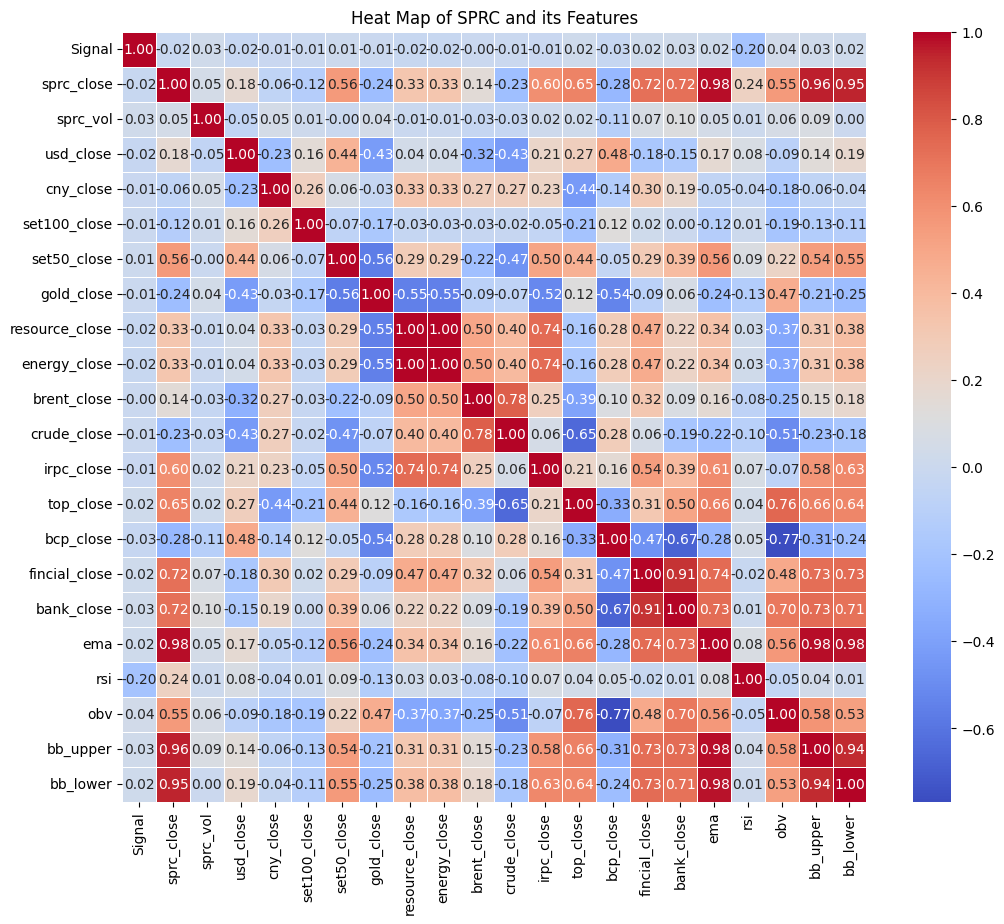

In [196]:
plt.figure(figsize=(12, 10))
sns.heatmap(sprc_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Heat Map of SPRC and its Features')

plt.show()

In [197]:
sprc_matrix = sprc_data.corr(numeric_only=True)

# Set correlation threshold values
strong_corr_threshold = 0.5
moderate_corr_threshold_low = 0.3
moderate_corr_threshold_high = 0.5

# Select features with strong correlation
strong_corr_features = sprc_matrix[sprc_matrix['sprc_close'].abs() >= strong_corr_threshold].index.tolist()

# Select features with moderate correlation
moderate_corr_features = sprc_matrix[(sprc_matrix['sprc_close'].abs() >= moderate_corr_threshold_low) &
                                 (sprc_matrix['sprc_close'].abs() < moderate_corr_threshold_high)].index.tolist()

# Combine the selected features
selected_features = strong_corr_features + moderate_corr_features

# Display the names of the selected features
print("Selected Feature Names:")
print(selected_features)

Selected Feature Names:
['sprc_close', 'set50_close', 'irpc_close', 'top_close', 'fincial_close', 'bank_close', 'ema', 'obv', 'bb_upper', 'bb_lower', 'resource_close', 'energy_close']


In [198]:
# sprc_features = ['ema', 'obv', 'bb_upper', 'bb_lower', 'rsi']
sprc_features = ['sprc_close', 'set50_close', 'irpc_close', 'top_close', 'fincial_close', 'bank_close', 'ema', 'obv', 'bb_upper', 'bb_lower', 'resource_close', 'energy_close']

for column in sprc_features:
    median_value = sprc_data[column].median()
    sprc_data[column].fillna(median_value, axis=0, inplace=True)

## Normalization

In [199]:
sprc_features = ['sprc_close', 'set50_close', 'irpc_close', 'top_close', 'fincial_close', 'bank_close', 'ema', 'obv', 'bb_upper', 'bb_lower', 'resource_close', 'energy_close']

# Create a MinMaxScaler instance
sprc_scaler = MinMaxScaler()

# Fit the scaler to the data and transform the specified columns
sprc_data[sprc_features] = sprc_scaler.fit_transform(sprc_data[sprc_features])

## Model Development

### Training

In [200]:
X_train_df = sprc_data[sprc_features]
y_train_df = sprc_data['Signal']

#### Split Data

In [201]:
X_train, X_test, y_train, y_test = train_test_split(X_train_df, y_train_df, test_size=0.2, random_state=42)

# Set parameter
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

k = 10
auc_scorer = make_scorer(roc_auc_score, greater_is_better = True, average= 'macro',multi_class='ovr',needs_proba=True)

In [202]:
X_train.isnull().sum()

sprc_close        0
set50_close       0
irpc_close        0
top_close         0
fincial_close     0
bank_close        0
ema               0
obv               0
bb_upper          0
bb_lower          0
resource_close    0
energy_close      0
dtype: int64

### 1. Logistic Regression

In [203]:
lgr = LogisticRegression(solver='liblinear', max_iter = 1000)
param_grid_lgr = {'C': np.logspace(-4, 4, 20), 'penalty': ['l1', 'l2']}
sprc_grid_search_lgr = GridSearchCV(estimator=lgr, param_grid=param_grid_lgr, cv=k, scoring=auc_scorer, return_train_score=False, verbose=1)
sprc_grid_search_lgr.fit(X_train, y_train)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


GridSearchCV(cv=10,
             estimator=LogisticRegression(max_iter=1000, solver='liblinear'),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']},
             scoring=make_scorer(roc_auc_score, needs_proba=True, average=macro, multi_class=ovr),
             verbose=1)

In [204]:
sprc_grid_search_lgr.best_params_

{'C': 29.763514416313132, 'penalty': 'l1'}

In [205]:
y_prob_lgr = sprc_grid_search_lgr.predict_proba(X_test)
y_pred_lgr = sprc_grid_search_lgr.predict(X_test)

# Convert y_test to a 1D array if it's not already
y_test_1d = y_test.ravel()

# Confusion Matrix
conf_matrix_lgr = confusion_matrix(y_test_1d, y_pred_lgr)

# AUC Score
auc_lgr = roc_auc_score(y_test_1d, y_prob_lgr[:, 1]) * 100  # Assuming binary classification, adjust if needed

# Print Confusion Matrix and AUC Score
print("\nLogistic Regression Confusion Matrix:")
print(conf_matrix_lgr)
print(f"Logistic Regression AUC Score: {auc_lgr:.2f}%")


Logistic Regression Confusion Matrix:
[[314   3]
 [ 77   4]]
Logistic Regression AUC Score: 72.06%


In [206]:
# Check overfitting or underfitting using ROC-AUC
y_train_prob = sprc_grid_search_lgr.predict_proba(X_train)[:, 1]
y_test_prob = sprc_grid_search_lgr.predict_proba(X_test)[:, 1]

# Calculate ROC-AUC on training and test sets
train_roc_auc = roc_auc_score(y_train, y_train_prob)
test_roc_auc = roc_auc_score(y_test, y_test_prob)

# Compare the ROC-AUC metrics to diagnose overfitting or underfitting
if train_roc_auc - test_roc_auc > 0.025:
    print("The model may be overfitting.")
elif train_roc_auc < 0.5 and test_roc_auc < 0.5:
    print("The model may be underfitting.")
else:
    print("The model performance is balanced.")

The model performance is balanced.


In [207]:
train_y_prob_lgr = sprc_grid_search_lgr.predict_proba(X_train)
train_auc_lgr = roc_auc_score(y_train.ravel(), train_y_prob_lgr[:, 1]) * 100

print(f"Train AUC Score: {train_auc_lgr:.2f}%")
print(f"Test AUC Score: {auc_lgr:.2f}%")

Train AUC Score: 70.82%
Test AUC Score: 72.06%


### 2. Extreme Gradient Boosting (XGBoost)

In [208]:
xgb_classifier = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
param_grid_xgb = {'n_estimators': [100, 200, 300], 'max_depth': [3, 4, 5], 'learning_rate': [0.1, 0.01, 0.001]}
grid_search_xgb = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid_xgb, cv=k, scoring=auc_scorer, return_train_score=False, verbose=1)
grid_search_xgb.fit(X_train, pd.DataFrame(y_train))

Fitting 10 folds for each of 27 candidates, totalling 270 fits


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             scoring=make_scorer(roc_auc_score, needs_proba=True, average=macro, multi_class=ovr),
             verbose=1)

In [209]:
y_prob_xgb = grid_search_xgb.predict_proba(X_test)
y_pred_xgb = grid_search_xgb.predict(X_test)

# Convert y_test to a 1D array if it's not already
y_test_1d = y_test.ravel()

# Confusion Matrix
conf_matrix_xgb = confusion_matrix(y_test_1d, y_pred_xgb)

# AUC Score
auc_xgb = roc_auc_score(y_test_1d, y_prob_xgb[:, 1]) * 100  # Assuming binary classification, adjust if needed

# Print Confusion Matrix and AUC Score
print("\nExtreme Gradient Boosting (XGBoost) Confusion Matrix:")
print(conf_matrix_xgb)
print(f"Extreme Gradient Boosting (XGBoost) AUC Score: {auc_xgb:.2f}%")


Extreme Gradient Boosting (XGBoost) Confusion Matrix:
[[317   0]
 [ 81   0]]
Extreme Gradient Boosting (XGBoost) AUC Score: 63.21%


In [210]:
# Check overfitting or underfitting using ROC-AUC
y_train_prob = grid_search_xgb.predict_proba(X_train)[:, 1]
y_test_prob = grid_search_xgb.predict_proba(X_test)[:, 1]

# Calculate ROC-AUC on training and test sets
train_roc_auc = roc_auc_score(y_train, y_train_prob)
test_roc_auc = roc_auc_score(y_test, y_test_prob)

# Compare the ROC-AUC metrics to diagnose overfitting or underfitting
if train_roc_auc - test_roc_auc > 0.025:
    print("The model may be overfitting.")
elif train_roc_auc < 0.5 and test_roc_auc < 0.5:
    print("The model may be underfitting.")
else:
    print("The model performance is balanced.")

The model may be overfitting.


In [211]:
train_y_prob_xgb = grid_search_xgb.predict_proba(X_train)
train_auc_xgb = roc_auc_score(y_train.ravel(), train_y_prob_xgb[:, 1]) * 100

print(f"Train AUC Score: {train_auc_xgb:.2f}%")
print(f"Test AUC Score: {auc_xgb:.2f}%")

Train AUC Score: 80.55%
Test AUC Score: 63.21%


### 3. SVM Support Vector Machine (SVM)

In [212]:
svm = SVC(probability=True)
param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svm, cv=k, scoring=auc_scorer, return_train_score=False, verbose=1)
grid_search_svm.fit(X_train, y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


GridSearchCV(cv=10, estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
             scoring=make_scorer(roc_auc_score, needs_proba=True, average=macro, multi_class=ovr),
             verbose=1)

In [213]:
y_prob_svm = grid_search_svm.predict_proba(X_test)
y_pred_svm = grid_search_svm.predict(X_test)

# Convert y_test to a 1D array if it's not already
y_test_1d = y_test.ravel()

# Confusion Matrix
conf_matrix_svm = confusion_matrix(y_test_1d, y_pred_svm)

# AUC Score
auc_svm = roc_auc_score(y_test_1d, y_prob_svm[:, 1]) * 100  # Assuming binary classification, adjust if needed

# Print Confusion Matrix and AUC Score
print("\nSVM Support Vector Machine (SVM) Confusion Matrix:")
print(conf_matrix_svm)
print(f"SVM Support Vector Machine (SVM) AUC Score: {auc_svm:.2f}%")


SVM Support Vector Machine (SVM) Confusion Matrix:
[[317   0]
 [ 81   0]]
SVM Support Vector Machine (SVM) AUC Score: 66.58%


In [214]:
# Check overfitting or underfitting using ROC-AUC
y_train_prob = grid_search_svm.predict_proba(X_train)[:, 1]
y_test_prob = grid_search_svm.predict_proba(X_test)[:, 1]

# Calculate ROC-AUC on training and test sets
train_roc_auc = roc_auc_score(y_train, y_train_prob)
test_roc_auc = roc_auc_score(y_test, y_test_prob)

# Compare the ROC-AUC metrics to diagnose overfitting or underfitting
if train_roc_auc - test_roc_auc > 0.025:
    print("The model may be overfitting.")
elif train_roc_auc < 0.5 and test_roc_auc < 0.5:
    print("The model may be underfitting.")
else:
    print("The model performance is balanced.")

The model may be overfitting.


In [215]:
train_y_prob_svm = grid_search_svm.predict_proba(X_train)
train_auc_svm = roc_auc_score(y_train.ravel(), train_y_prob_svm[:, 1]) * 100

print(f"Train AUC Score: {train_auc_svm:.2f}%")
print(f"Test AUC Score: {auc_svm:.2f}%")

Train AUC Score: 82.04%
Test AUC Score: 66.58%


### 4. Random forest

In [216]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
param_grid_rf = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=k, scoring=auc_scorer, return_train_score=False, verbose=1)
grid_search_rf.fit(X_train, y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring=make_scorer(roc_auc_score, needs_proba=True, average=macro, multi_class=ovr),
             verbose=1)

In [217]:
y_prob_rf = grid_search_rf.predict_proba(X_test)
y_pred_rf = grid_search_rf.predict(X_test)

# Convert y_test to a 1D array if it's not already
y_test_1d = y_test.ravel()

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test_1d, y_pred_rf)

# AUC Score
auc_rf = roc_auc_score(y_test_1d, y_prob_rf[:, 1]) * 100  # Assuming binary classification, adjust if needed

# Print Confusion Matrix and AUC Score
print("\nRandom forest Confusion Matrix:")
print(conf_matrix_rf)
print(f"Random forest AUC Score: {auc_rf:.2f}%")


Random forest Confusion Matrix:
[[316   1]
 [ 80   1]]
Random forest AUC Score: 58.62%


In [218]:
# Check overfitting or underfitting using ROC-AUC
y_train_prob = grid_search_rf.predict_proba(X_train)[:, 1]
y_test_prob = grid_search_rf.predict_proba(X_test)[:, 1]

# Calculate ROC-AUC on training and test sets
train_roc_auc = roc_auc_score(y_train, y_train_prob)
test_roc_auc = roc_auc_score(y_test, y_test_prob)

# Compare the ROC-AUC metrics to diagnose overfitting or underfitting
if train_roc_auc - test_roc_auc > 0.025:
    print("The model may be overfitting.")
elif train_roc_auc < 0.5 and test_roc_auc < 0.5:
    print("The model may be underfitting.")
else:
    print("The model performance is balanced.")

The model may be overfitting.


In [219]:
train_y_prob_rf = grid_search_rf.predict_proba(X_train)
train_auc_rf = roc_auc_score(y_train.ravel(), train_y_prob_rf[:, 1]) * 100

print(f"Train AUC Score: {train_auc_rf:.2f}%")
print(f"Test AUC Score: {auc_rf:.2f}%")

Train AUC Score: 95.51%
Test AUC Score: 58.62%


### 5. Decision tree

In [220]:
dt = DecisionTreeClassifier(random_state=42)
param_grid_dt = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=k, scoring=auc_scorer, return_train_score=False, verbose=1)
grid_search_dt.fit(X_train, y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring=make_scorer(roc_auc_score, needs_proba=True, average=macro, multi_class=ovr),
             verbose=1)

In [221]:
y_prob_dt = grid_search_dt.predict_proba(X_test)
y_pred_dt = grid_search_dt.predict(X_test)

# Convert y_test to a 1D array if it's not already
y_test_1d = y_test.ravel()

# Confusion Matrix
conf_matrix_dt = confusion_matrix(y_test_1d, y_pred_dt)

# AUC Score
auc_dt = roc_auc_score(y_test_1d, y_prob_dt[:, 1]) * 100  # Assuming binary classification, adjust if needed

# Print Confusion Matrix and AUC Score
print("\nDecision tree Confusion Matrix:")
print(conf_matrix_dt)
print(f"Decision tree AUC Score: {auc_dt:.2f}%")


Decision tree Confusion Matrix:
[[299  18]
 [ 72   9]]
Decision tree AUC Score: 57.80%


In [222]:
# Check overfitting or underfitting using ROC-AUC
y_train_prob = grid_search_rf.predict_proba(X_train)[:, 1]
y_test_prob = grid_search_rf.predict_proba(X_test)[:, 1]

# Calculate ROC-AUC on training and test sets
train_roc_auc = roc_auc_score(y_train, y_train_prob)
test_roc_auc = roc_auc_score(y_test, y_test_prob)

# Compare the ROC-AUC metrics to diagnose overfitting or underfitting
if train_roc_auc - test_roc_auc > 0.025:
    print("The model may be overfitting.")
elif train_roc_auc < 0.5 and test_roc_auc < 0.5:
    print("The model may be underfitting.")
else:
    print("The model performance is balanced.")

The model may be overfitting.


In [223]:
train_y_prob_rf = grid_search_rf.predict_proba(X_train)
train_auc_rf = roc_auc_score(y_train.ravel(), train_y_prob_rf[:, 1]) * 100

print(f"Train AUC Score: {train_auc_rf:.2f}%")
print(f"Test AUC Score: {auc_rf:.2f}%")

Train AUC Score: 95.51%
Test AUC Score: 58.62%


### 6. Gaussian Naive Bayes

In [224]:
gnb = GaussianNB()
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}
grid_search_gnb = GridSearchCV(GaussianNB(), param_grid, cv=k)
grid_search_gnb.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]})

In [225]:
y_prob_gnb = grid_search_gnb.predict_proba(X_test)
y_pred_gnb = grid_search_gnb.predict(X_test)

# Convert y_test to a 1D array if it's not already
y_test_1d = y_test.ravel()

# Confusion Matrix
conf_matrix_gnb = confusion_matrix(y_test_1d, y_pred_gnb)

# AUC Score
auc_gnb = roc_auc_score(y_test_1d, y_prob_gnb[:, 1]) * 100  # Assuming binary classification, adjust if needed

# Print Confusion Matrix and AUC Score
print("\nGaussian Naive Bayes Confusion Matrix:")
print(conf_matrix_gnb)
print(f"Gaussian Naive Bayes AUC Score: {auc_gnb:.2f}%")


Gaussian Naive Bayes Confusion Matrix:
[[317   0]
 [ 81   0]]
Gaussian Naive Bayes AUC Score: 55.44%


In [226]:
# Check overfitting or underfitting using ROC-AUC
y_train_prob = grid_search_gnb.predict_proba(X_train)[:, 1]
y_test_prob = grid_search_gnb.predict_proba(X_test)[:, 1]

# Calculate ROC-AUC on training and test sets
train_roc_auc = roc_auc_score(y_train, y_train_prob)
test_roc_auc = roc_auc_score(y_test, y_test_prob)

# Compare the ROC-AUC metrics to diagnose overfitting or underfitting
if train_roc_auc - test_roc_auc > 0.025:
    print("The model may be overfitting.")
elif train_roc_auc < 0.5 and test_roc_auc < 0.5:
    print("The model may be underfitting.")
else:
    print("The model performance is balanced.")

The model performance is balanced.


In [227]:
train_y_prob_gnb = grid_search_gnb.predict_proba(X_train)
train_auc_gnb = roc_auc_score(y_train.ravel(), train_y_prob_gnb[:, 1]) * 100

print(f"Train AUC Score: {train_auc_gnb:.2f}%")
print(f"Test AUC Score: {auc_gnb:.2f}%")

Train AUC Score: 53.87%
Test AUC Score: 55.44%


### Summary score (SPRC)

In [228]:
print(f"Logistic regression AUC Score: {auc_lgr:.2f}%", end='\n\n')
print(f"Extreme Gradient Boosting (XGBoost) regression AUC Score: {auc_xgb:.2f}%", end='\n\n')
print(f"SVM Support Vector Machine (SVM) regression AUC Score: {auc_svm:.2f}%", end='\n\n')
print(f"Random forest regression AUC Score: {auc_rf:.2f}%", end='\n\n')
print(f"Decision tree regression AUC Score: {auc_dt:.2f}%", end='\n\n')
print(f"Gaussian Naive Bayes regression AUC Score: {auc_gnb:.2f}%", end='\n\n')

Logistic regression AUC Score: 72.06%

Extreme Gradient Boosting (XGBoost) regression AUC Score: 63.21%

SVM Support Vector Machine (SVM) regression AUC Score: 66.58%

Random forest regression AUC Score: 58.62%

Decision tree regression AUC Score: 57.80%

Gaussian Naive Bayes regression AUC Score: 55.44%



## Model Selection

Select Logistic Regression Model

In [229]:
sprc_data.dtypes

Datetime          datetime64[ns, Asia/Bangkok]
Signal                                   int64
sprc_close                             float64
sprc_vol                                 int64
usd_close                              float64
cny_close                              float64
set100_close                           float64
set50_close                            float64
gold_close                             float64
resource_close                         float64
energy_close                           float64
brent_close                            float64
crude_close                            float64
irpc_close                             float64
top_close                              float64
bcp_close                              float64
fincial_close                          float64
bank_close                             float64
ema                                    float64
rsi                                    float64
obv                                    float64
bb_upper     

In [230]:
sprc_x_df = sprc_data[sprc_features]
sprc_y_df = sprc_data['Signal']

In [231]:
for column in sprc_x_df:
    median_value = sprc_data[column].median()
    sprc_data[column].fillna(median_value, axis=0, inplace=True)

In [232]:
X_train = sprc_x_df
y_train = sprc_y_df.values.ravel()

# Hyperparameter
k = 10
C = 29.763514416313132
penalty = 'l1'

# Machine Learning Model
sprc_final_model = LogisticRegression(solver='liblinear', C = C, penalty = penalty, verbose=1, max_iter = 1000)
sprc_final_model.fit(X_train, y_train)

[LibLinear]

LogisticRegression(C=29.763514416313132, max_iter=1000, penalty='l1',
                   solver='liblinear', verbose=1)

In [233]:
y_test_pred = sprc_final_model.predict(X_test)
# Print the classification report
print(classification_report(y_test, y_test_pred))

# y_predict = tisco_final_model.predict_proba(X_df)[:,1]
# test_auc = roc_auc_score(y_df, y_predict)

test_auc = roc_auc_score(y_test_1d, y_prob_lgr[:, 1]) * 100

# Print the scores
print(f"AUC Score: {test_auc:.4f}")

              precision    recall  f1-score   support

           0       0.80      0.98      0.88       317
           1       0.44      0.05      0.09        81

    accuracy                           0.79       398
   macro avg       0.62      0.52      0.49       398
weighted avg       0.73      0.79      0.72       398

AUC Score: 72.0606


In [234]:
# Save sprc_scaler
directory = "/content/save_model"
if not os.path.exists(directory):
    os.makedirs(directory)

# Specify the full path for saving the model
sprc_scaler_file_path = os.path.join(directory, "sprc_scaler_strong_features.pkl")

# Save the model
joblib.dump(sprc_scaler, sprc_scaler_file_path)

['/content/save_model/sprc_scaler_strong_features.pkl']

In [235]:
# Save sprc_Model
directory = "/content/save_model"
if not os.path.exists(directory):
    os.makedirs(directory)

# Specify the full path for saving the model
sprc_model_file_path = os.path.join(directory, "sprc_final_model_strong_features.pkl")

# Save the model
joblib.dump(sprc_final_model, sprc_model_file_path)

['/content/save_model/sprc_final_model_strong_features.pkl']

# ERW Model

## Define Variables

In [236]:
## Set Y
erw['Close_Shift'] = erw['Close'].shift(-1)
erw['Close_Shift'] = erw['Close_Shift'].fillna(method='ffill')

## Set Y Condition
erw['Signal'] = np.where(erw['Close_Shift'] > erw['Close'], 1, 0)

In [237]:
erw['Signal']

0       0
1       1
2       0
3       1
4       0
       ..
1958    0
1959    1
1960    0
1961    0
1962    0
Name: Signal, Length: 1963, dtype: int64

In [238]:
# Set Variables
# Set Y
erw_signal = erw['Signal']

# Reference date
ref_date = erw['Datetime']

In [239]:
# Create DataFrames for each variable
erw_df = pd.DataFrame({'Datetime': erw['Datetime'], 'Signal': erw['Signal'], 'erw_close': erw['Close'], 'erw_vol': erw['Volume']})
usd_df = pd.DataFrame({'Datetime': ref_date, 'usd_close': usd})
cny_df = pd.DataFrame({'Datetime': ref_date, 'cny_close': cny})
set100_df = pd.DataFrame({'Datetime': ref_date, 'set100_close': set100})
set50_df = pd.DataFrame({'Datetime': ref_date, 'set50_close': set50})
gold_df = pd.DataFrame({'Datetime': ref_date, 'gold_close': gold})
service_df = pd.DataFrame({'Datetime': ref_date, 'service_close': fin})
tour_df = pd.DataFrame({'Datetime': ref_date, 'tour_close': bank})

fin_df = pd.DataFrame({'Datetime': ref_date, 'fincial_close': fin})
bank_df = pd.DataFrame({'Datetime': ref_date, 'bank_close': bank})
resource_df = pd.DataFrame({'Datetime': ref_date, 'resource_close': resource})


# Merge all DataFrames on the 'Datetime' column
erw_merged = pd.merge(erw_df, usd_df, on='Datetime', how='left')
erw_merged = pd.merge(erw_merged, cny_df, on='Datetime', how='left')
erw_merged = pd.merge(erw_merged, set100_df, on='Datetime', how='left')
erw_merged = pd.merge(erw_merged, set50_df, on='Datetime', how='left')
erw_merged = pd.merge(erw_merged, gold_df, on='Datetime', how='left')
erw_merged = pd.merge(erw_merged, service_df, on='Datetime', how='left')
erw_merged = pd.merge(erw_merged, tour_df, on='Datetime', how='left')
erw_merged = pd.merge(erw_merged, fin_df, on='Datetime', how='left')
erw_merged = pd.merge(erw_merged, bank_df, on='Datetime', how='left')
erw_merged = pd.merge(erw_merged, resource_df, on='Datetime', how='left')


# Display the merged DataFrame
print(erw_merged)

                      Datetime  Signal  erw_close  erw_vol  usd_close  \
0    2023-11-16 10:00:00+07:00       0       5.30        0  35.450001   
1    2023-11-16 10:05:00+07:00       1       5.25  1243700  35.459999   
2    2023-11-16 10:10:00+07:00       0       5.30    89900  35.470001   
3    2023-11-16 10:15:00+07:00       1       5.30   557100  35.459999   
4    2023-11-16 10:20:00+07:00       0       5.35  1151000  35.470001   
...                        ...     ...        ...      ...        ...   
1958 2024-01-12 16:05:00+07:00       0       5.10    27200  34.882999   
1959 2024-01-12 16:10:00+07:00       1       5.05    44100  34.884998   
1960 2024-01-12 16:15:00+07:00       0       5.10    77600  34.882000   
1961 2024-01-12 16:20:00+07:00       0       5.05   639800  34.883999   
1962 2024-01-12 16:25:00+07:00       0       5.05   154605  34.882999   

      cny_close  set100_close  set50_close   gold_close  service_close  \
0        7.2474          9.25         8.61  1983.

In [240]:
# Check Null values
nan_count = erw_merged.isna().sum()
print("NaN (n) = 722:")
print(nan_count, '\n')

NaN (n) = 722:
Datetime             0
Signal               0
erw_close            0
erw_vol              0
usd_close            0
cny_close          151
set100_close      1417
set50_close        155
gold_close           0
service_close        0
tour_close           0
fincial_close        0
bank_close           0
resource_close       0
dtype: int64 



In [241]:
# Fill Null Values
erw_merged.fillna(method = 'ffill', inplace = True)

In [242]:
# Check Null values after fill
nan_count = erw_merged.isna().sum()
print("NaN (n) = 722:")
print(nan_count, '\n')

NaN (n) = 722:
Datetime          0
Signal            0
erw_close         0
erw_vol           0
usd_close         0
cny_close         0
set100_close      0
set50_close       0
gold_close        0
service_close     0
tour_close        0
fincial_close     0
bank_close        0
resource_close    0
dtype: int64 



## Check Normality & Skewness

In [243]:
column_names_list = list(erw_merged.columns)
print(column_names_list)

['Datetime', 'Signal', 'erw_close', 'erw_vol', 'usd_close', 'cny_close', 'set100_close', 'set50_close', 'gold_close', 'service_close', 'tour_close', 'fincial_close', 'bank_close', 'resource_close']


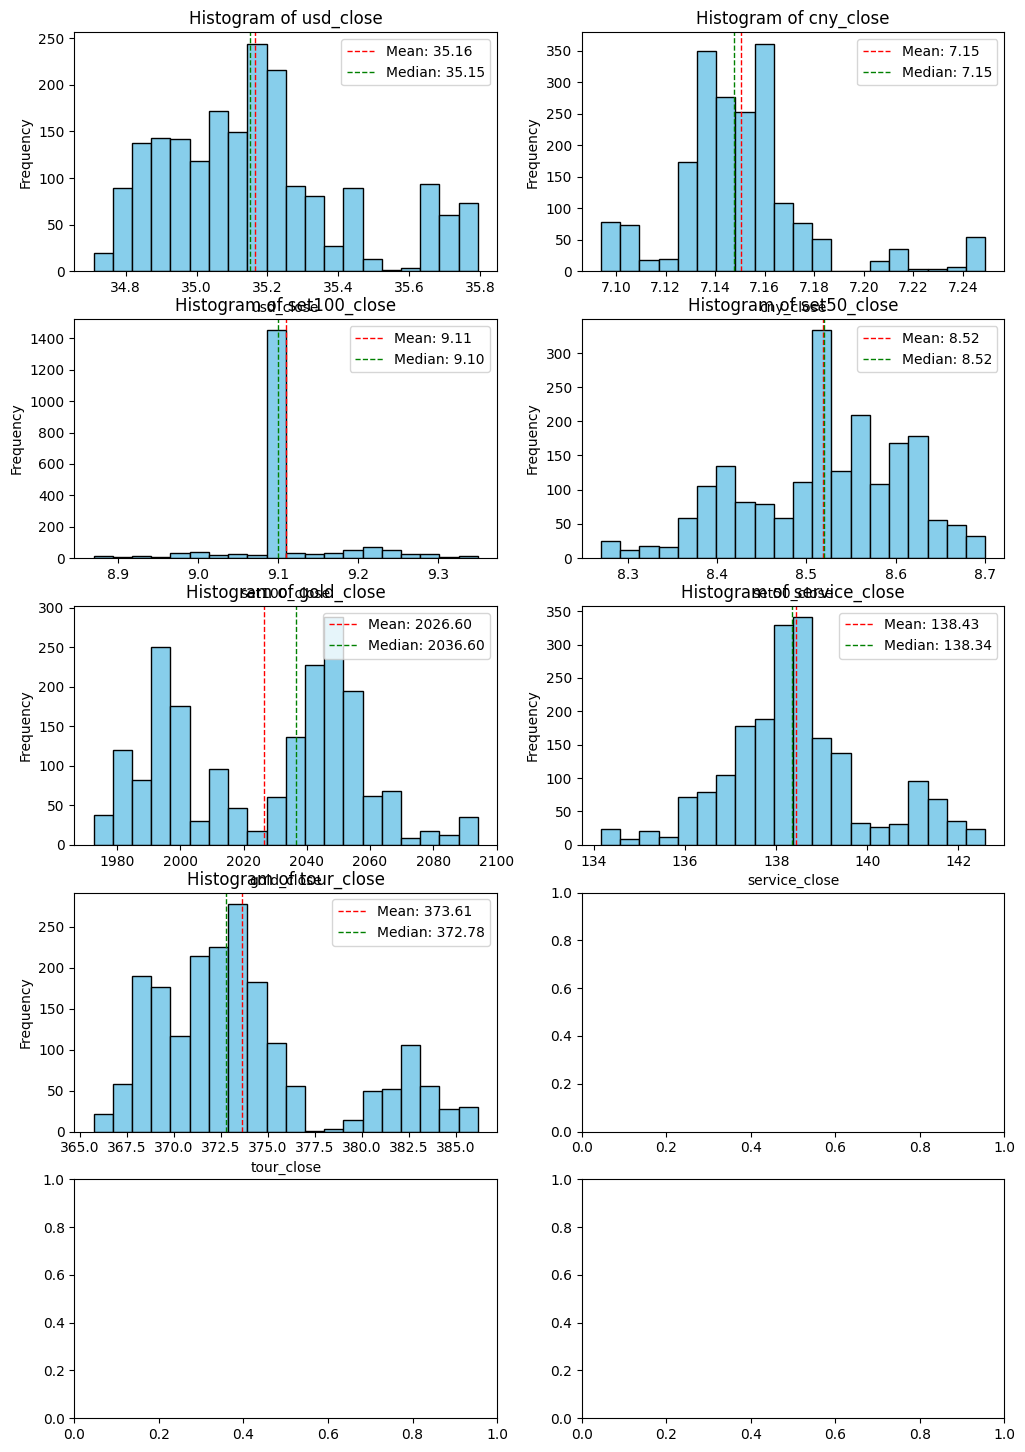

In [244]:
## Check Skewness
columns = ['usd_close', 'cny_close', 'set100_close', 'set50_close',
           'gold_close', 'service_close', 'tour_close']

fig, axs = plt.subplots(5, 2, figsize=(12, 18))

# Flatten the 2D array of axes to simplify indexing
axs = axs.flatten()

for i, column in enumerate(columns):
    axs[i].hist(erw_merged[column], bins=20, color='skyblue', edgecolor='black')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Frequency')
    axs[i].set_title(f'Histogram of {column}')

    mean_val = erw_merged[column].mean()
    median_val = erw_merged[column].median()

    axs[i].axvline(mean_val, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_val:.2f}')
    axs[i].axvline(median_val, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_val:.2f}')
    axs[i].legend()

In [245]:
## Check Normality

for column_name in columns:
    df_tmp = erw_merged[[column_name]].dropna()

    print(f'{column_name} : ', end='')

    # Perform Anderson-Darling test for normality
    statistic, critical_values, significance_levels = stats.anderson(df_tmp[column_name], dist='norm')
    print(f'Statistic: {statistic:.3f}, \nCritical Values: {critical_values}, \nSignificance Levels: {significance_levels}')

    # Check normality based on the 5% significance level
    if statistic >= critical_values[2]:
        print('## Not normal ##')
    else:
        print('# Normal #')

    print('==========================================')

usd_close : Statistic: 34.116, 
Critical Values: [0.575 0.655 0.785 0.916 1.09 ], 
Significance Levels: [15.  10.   5.   2.5  1. ]
## Not normal ##
cny_close : Statistic: 53.269, 
Critical Values: [0.575 0.655 0.785 0.916 1.09 ], 
Significance Levels: [15.  10.   5.   2.5  1. ]
## Not normal ##
set100_close : Statistic: 312.110, 
Critical Values: [0.575 0.655 0.785 0.916 1.09 ], 
Significance Levels: [15.  10.   5.   2.5  1. ]
## Not normal ##
set50_close : Statistic: 18.318, 
Critical Values: [0.575 0.655 0.785 0.916 1.09 ], 
Significance Levels: [15.  10.   5.   2.5  1. ]
## Not normal ##
gold_close : Statistic: 59.977, 
Critical Values: [0.575 0.655 0.785 0.916 1.09 ], 
Significance Levels: [15.  10.   5.   2.5  1. ]
## Not normal ##
service_close : Statistic: 28.448, 
Critical Values: [0.575 0.655 0.785 0.916 1.09 ], 
Significance Levels: [15.  10.   5.   2.5  1. ]
## Not normal ##
tour_close : Statistic: 70.875, 
Critical Values: [0.575 0.655 0.785 0.916 1.09 ], 
Significance Leve

## Adding Technical Features

In [246]:
# Create a copy of the DataFrame to avoid modifying the original data
erw_data = erw_merged.copy()

# Adding Technical Features
erw_data['ema'] = ta.trend.ema_indicator(close=erw_data['erw_close'], window=10) #adjust time period
erw_data['rsi'] = ta.momentum.RSIIndicator(close=erw_data['erw_close'], window=14).rsi()
erw_data['obv'] = ta.volume.OnBalanceVolumeIndicator(close=erw_data['erw_close'], volume=erw_data['erw_vol']).on_balance_volume()
erw_data['bb_upper'], erw_data['bb_medium'], erw_data['bb_lower'] = ta.volatility.bollinger_hband(close=erw_data['erw_close'], window=20), ta.volatility.bollinger_mavg(close=erw_data['erw_close'], window=20), ta.volatility.bollinger_lband(close=erw_data['erw_close'], window=20)

erw_data.fillna(method = 'bfill', inplace = True)
erw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963 entries, 0 to 1962
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype                       
---  ------          --------------  -----                       
 0   Datetime        1963 non-null   datetime64[ns, Asia/Bangkok]
 1   Signal          1963 non-null   int64                       
 2   erw_close       1963 non-null   float64                     
 3   erw_vol         1963 non-null   int64                       
 4   usd_close       1963 non-null   float64                     
 5   cny_close       1963 non-null   float64                     
 6   set100_close    1963 non-null   float64                     
 7   set50_close     1963 non-null   float64                     
 8   gold_close      1963 non-null   float64                     
 9   service_close   1963 non-null   float64                     
 10  tour_close      1963 non-null   float64                     
 11  fincial_close   1963 non-null 

In [247]:
erw_data.isnull().sum()

Datetime          0
Signal            0
erw_close         0
erw_vol           0
usd_close         0
cny_close         0
set100_close      0
set50_close       0
gold_close        0
service_close     0
tour_close        0
fincial_close     0
bank_close        0
resource_close    0
ema               0
rsi               0
obv               0
bb_upper          0
bb_medium         0
bb_lower          0
dtype: int64

In [248]:
erw_corr = erw_data.corr()['erw_close']

print("Correlation with erw15_close:")
print(erw_corr)

print("\nInterpretation:")
for variable, correlation in erw_corr.items():
    if correlation > 0.7 or correlation < -0.7:
        print(f"The correlation between 'erw15_close' and '{variable}' is strong ({correlation:.2f})")
    elif 0.3 <= correlation <= 0.7 or -0.7 <= correlation <= -0.3:
        print(f"The correlation between 'erw15_close' and '{variable}' is moderate ({correlation:.2f})")
    elif 0.1 <= correlation <= 0.3 or -0.3 <= correlation <= -0.1:
        print(f"The correlation between 'erw15_close' and '{variable}' is weak ({correlation:.2f})")
    else:
        print(f"There is no significant correlation between 'erw15_close' and '{variable}' ({correlation:.2f})")

Correlation with erw15_close:
Signal           -0.066499
erw_close         1.000000
erw_vol           0.081049
usd_close         0.167558
cny_close         0.395280
set100_close      0.072120
set50_close       0.165759
gold_close       -0.555524
service_close     0.081497
tour_close       -0.100158
fincial_close     0.081497
bank_close       -0.100158
resource_close    0.637357
ema               0.974786
rsi               0.367480
obv              -0.696633
bb_upper          0.923276
bb_medium         0.944821
bb_lower          0.917449
Name: erw_close, dtype: float64

Interpretation:
There is no significant correlation between 'erw15_close' and 'Signal' (-0.07)
The correlation between 'erw15_close' and 'erw_close' is strong (1.00)
There is no significant correlation between 'erw15_close' and 'erw_vol' (0.08)
The correlation between 'erw15_close' and 'usd_close' is weak (0.17)
The correlation between 'erw15_close' and 'cny_close' is moderate (0.40)
There is no significant correlation b

<ipython-input-248-857fbabae7cd>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  erw_corr = erw_data.corr()['erw_close']


<ipython-input-249-b74e3840949d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(erw_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)


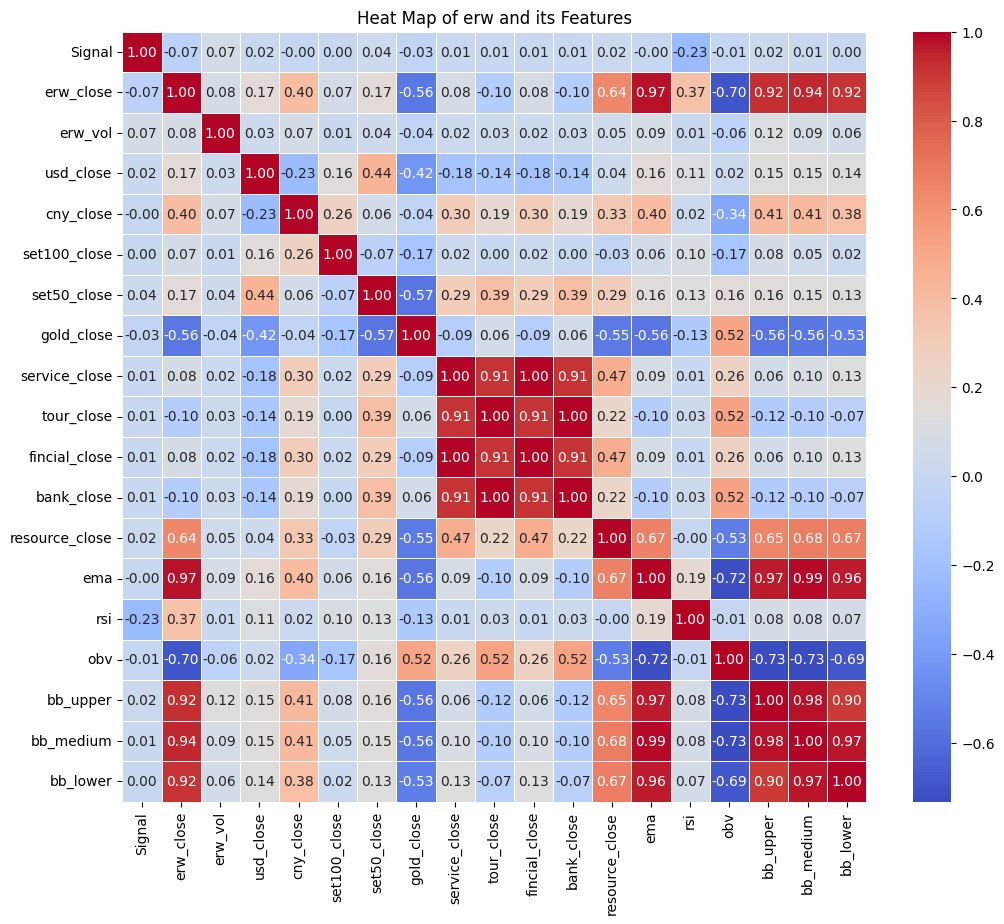

In [249]:
plt.figure(figsize=(12, 10))
sns.heatmap(erw_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Heat Map of erw and its Features')

plt.show()

In [250]:
erw_matrix = erw_data.corr(numeric_only=True)

# Set correlation threshold values
strong_corr_threshold = 0.5
moderate_corr_threshold_low = 0.3
moderate_corr_threshold_high = 0.5
weak_corr_threshold = 0  # Adjust the weak correlation threshold as needed

# Select features with strong correlation
strong_corr_features = erw_matrix[erw_matrix['erw_close'].abs() >= strong_corr_threshold].index.tolist()

# Select features with moderate correlation
moderate_corr_features = erw_matrix[(erw_matrix['erw_close'].abs() >= moderate_corr_threshold_low) &
                                    (erw_matrix['erw_close'].abs() < moderate_corr_threshold_high)].index.tolist()

# Select features with weak correlation
weak_corr_features = erw_matrix[(erw_matrix['erw_close'].abs() >= weak_corr_threshold) &
                                (erw_matrix['erw_close'].abs() < moderate_corr_threshold_low)].index.tolist()

# Combine the selected features
selected_features = strong_corr_features + moderate_corr_features

# Display the names of the selected features
print("Selected Feature Names:")
print(selected_features)

Selected Feature Names:
['erw_close', 'gold_close', 'resource_close', 'ema', 'obv', 'bb_upper', 'bb_medium', 'bb_lower', 'cny_close', 'rsi']


In [251]:
# Recommended Features:
# erw_features = ['ema', 'obv', 'bb_upper', 'bb_medium', 'bb_lower','rsi']
erw_features = ['erw_close', 'gold_close', 'resource_close', 'ema', 'obv', 'bb_upper', 'bb_medium', 'bb_lower', 'cny_close', 'rsi']
for column in erw_features:
    median_value = erw_data[column].median()
    erw_data[column].fillna(median_value, inplace=True)

## Normalization

In [252]:
# Specify the columns you want to normalize
# erw_features = ['ema', 'obv', 'bb_upper', 'bb_medium', 'bb_lower','rsi']
erw_features = ['erw_close', 'gold_close', 'resource_close', 'ema', 'obv', 'bb_upper', 'bb_medium', 'bb_lower', 'cny_close', 'rsi']

# Create a MinMaxScaler instance
erw_scaler = MinMaxScaler()

# Fit the scaler to the data and transform the specified columns
erw_data[erw_features] = erw_scaler.fit_transform(erw_data[erw_features])

## Model Development

### Training

In [253]:
X_train_df = erw_data[erw_features]
y_train_df = erw_data['Signal']

#### Split Data

In [254]:
X_train, X_test, y_train, y_test = train_test_split(X_train_df, y_train_df, test_size=0.2, random_state=42)

# Set parameter
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

k = 10
auc_scorer = make_scorer(roc_auc_score, greater_is_better = True, average= 'macro',multi_class='ovr',needs_proba=True)

### 1. Logistic Regression

In [255]:
lgr = LogisticRegression(solver='liblinear')
param_grid_lgr = {'C': np.logspace(-4, 4, 20), 'penalty': ['l1', 'l2']}
erw_grid_search_lgr = GridSearchCV(estimator=lgr, param_grid=param_grid_lgr, cv=k, scoring=auc_scorer, return_train_score=False, verbose=1)
erw_grid_search_lgr.fit(X_train, y_train)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


GridSearchCV(cv=10, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']},
             scoring=make_scorer(roc_auc_score, needs_proba=True, average=macro, multi_class=ovr),
             verbose=1)

In [256]:
erw_grid_search_lgr.best_params_

{'C': 3792.690190732246, 'penalty': 'l2'}

In [257]:
y_prob_lgr = erw_grid_search_lgr.predict_proba(X_test)
y_pred_lgr = erw_grid_search_lgr.predict(X_test)

# Convert y_test to a 1D array if it's not already
y_test_1d = y_test.ravel()

# Confusion Matrix
conf_matrix_lgr = confusion_matrix(y_test_1d, y_pred_lgr)

# AUC Score
auc_lgr = roc_auc_score(y_test_1d, y_prob_lgr[:, 1]) * 100  # Assuming binary classification, adjust if needed

# Print Confusion Matrix and AUC Score
print("\nLogistic Regression Confusion Matrix:")
print(conf_matrix_lgr)
print(f"Logistic Regression AUC Score: {auc_lgr:.2f}%")


Logistic Regression Confusion Matrix:
[[317   8]
 [ 63   5]]
Logistic Regression AUC Score: 71.57%


In [258]:
# Check overfitting or underfitting using ROC-AUC
y_train_prob = erw_grid_search_lgr.predict_proba(X_train)[:, 1]
y_test_prob = erw_grid_search_lgr.predict_proba(X_test)[:, 1]

# Calculate ROC-AUC on training and test sets
train_roc_auc = roc_auc_score(y_train, y_train_prob)
test_roc_auc = roc_auc_score(y_test, y_test_prob)

# Compare the ROC-AUC metrics to diagnose overfitting or underfitting
if train_roc_auc - test_roc_auc > 0.025:
    print("The model may be overfitting.")
elif train_roc_auc < 0.5 and test_roc_auc < 0.5:
    print("The model may be underfitting.")
else:
    print("The model performance is balanced.")

The model may be overfitting.


In [259]:
train_y_prob_lgr = erw_grid_search_lgr.predict_proba(X_train)
train_auc_lgr = roc_auc_score(y_train.ravel(), train_y_prob_lgr[:, 1]) * 100

print(f"Train AUC Score: {train_auc_lgr:.2f}%")
print(f"Test AUC Score: {auc_lgr:.2f}%")

Train AUC Score: 75.87%
Test AUC Score: 71.57%


### 2. Extreme Gradient Boosting (XGBoost)

In [260]:
xgb_classifier = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
param_grid_xgb = {'n_estimators': [100, 200, 300], 'max_depth': [3, 4, 5], 'learning_rate': [0.1, 0.01, 0.001]}
grid_search_xgb = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid_xgb, cv=k, scoring=auc_scorer, return_train_score=False, verbose=1)
grid_search_xgb.fit(X_train, pd.DataFrame(y_train))

Fitting 10 folds for each of 27 candidates, totalling 270 fits


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             scoring=make_scorer(roc_auc_score, needs_proba=True, average=macro, multi_class=ovr),
             verbose=1)

In [261]:
y_prob_xgb = grid_search_xgb.predict_proba(X_test)
y_pred_xgb = grid_search_xgb.predict(X_test)

# Convert y_test to a 1D array if it's not already
y_test_1d = y_test.ravel()

# Confusion Matrix
conf_matrix_xgb = confusion_matrix(y_test_1d, y_pred_xgb)

# AUC Score
auc_xgb = roc_auc_score(y_test_1d, y_prob_xgb[:, 1]) * 100  # Assuming binary classification, adjust if needed

# Print Confusion Matrix and AUC Score
print("\nExtreme Gradient Boosting (XGBoost) Confusion Matrix:")
print(conf_matrix_xgb)
print(f"Extreme Gradient Boosting (XGBoost) AUC Score: {auc_xgb:.2f}%")


Extreme Gradient Boosting (XGBoost) Confusion Matrix:
[[323   2]
 [ 62   6]]
Extreme Gradient Boosting (XGBoost) AUC Score: 71.67%


In [262]:
# Check overfitting or underfitting using ROC-AUC
y_train_prob = grid_search_xgb.predict_proba(X_train)[:, 1]
y_test_prob = grid_search_xgb.predict_proba(X_test)[:, 1]

# Calculate ROC-AUC on training and test sets
train_roc_auc = roc_auc_score(y_train, y_train_prob)
test_roc_auc = roc_auc_score(y_test, y_test_prob)

# Compare the ROC-AUC metrics to diagnose overfitting or underfitting
if train_roc_auc - test_roc_auc > 0.025:
    print("The model may be overfitting.")
elif train_roc_auc < 0.5 and test_roc_auc < 0.5:
    print("The model may be underfitting.")
else:
    print("The model performance is balanced.")

The model may be overfitting.


In [263]:
train_y_prob_xgb = grid_search_xgb.predict_proba(X_train)
train_auc_xgb = roc_auc_score(y_train.ravel(), train_y_prob_xgb[:, 1]) * 100

print(f"Train AUC Score: {train_auc_xgb:.2f}%")
print(f"Test AUC Score: {auc_xgb:.2f}%")

Train AUC Score: 90.69%
Test AUC Score: 71.67%


### 3. SVM Support Vector Machine (SVM)

In [264]:
svm = SVC(probability=True)
param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svm, cv=k, scoring=auc_scorer, return_train_score=False, verbose=1)
grid_search_svm.fit(X_train, y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


GridSearchCV(cv=10, estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
             scoring=make_scorer(roc_auc_score, needs_proba=True, average=macro, multi_class=ovr),
             verbose=1)

In [265]:
y_prob_svm = grid_search_svm.predict_proba(X_test)
y_pred_svm = grid_search_svm.predict(X_test)

# Convert y_test to a 1D array if it's not already
y_test_1d = y_test.ravel()

# Confusion Matrix
conf_matrix_svm = confusion_matrix(y_test_1d, y_pred_svm)

# AUC Score
auc_svm = roc_auc_score(y_test_1d, y_prob_svm[:, 1]) * 100  # Assuming binary classification, adjust if needed

# Print Confusion Matrix and AUC Score
print("\nSVM Support Vector Machine (SVM) Confusion Matrix:")
print(conf_matrix_svm)
print(f"SVM Support Vector Machine (SVM) AUC Score: {auc_svm:.2f}%")


SVM Support Vector Machine (SVM) Confusion Matrix:
[[325   0]
 [ 68   0]]
SVM Support Vector Machine (SVM) AUC Score: 70.54%


In [266]:
# Check overfitting or underfitting using ROC-AUC
y_train_prob = grid_search_svm.predict_proba(X_train)[:, 1]
y_test_prob = grid_search_svm.predict_proba(X_test)[:, 1]

# Calculate ROC-AUC on training and test sets
train_roc_auc = roc_auc_score(y_train, y_train_prob)
test_roc_auc = roc_auc_score(y_test, y_test_prob)

# Compare the ROC-AUC metrics to diagnose overfitting or underfitting
if train_roc_auc - test_roc_auc > 0.025:
    print("The model may be overfitting.")
elif train_roc_auc < 0.5 and test_roc_auc < 0.5:
    print("The model may be underfitting.")
else:
    print("The model performance is balanced.")

The model performance is balanced.


In [267]:
train_y_prob_svm = grid_search_svm.predict_proba(X_train)
train_auc_svm = roc_auc_score(y_train.ravel(), train_y_prob_svm[:, 1]) * 100

print(f"Train AUC Score: {train_auc_svm:.2f}%")
print(f"Test AUC Score: {auc_svm:.2f}%")

Train AUC Score: 72.28%
Test AUC Score: 70.54%


### 4. Random forest

In [268]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
param_grid_rf = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=k, scoring=auc_scorer, return_train_score=False, verbose=1)
grid_search_rf.fit(X_train, y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring=make_scorer(roc_auc_score, needs_proba=True, average=macro, multi_class=ovr),
             verbose=1)

In [269]:
y_prob_rf = grid_search_rf.predict_proba(X_test)
y_pred_rf = grid_search_rf.predict(X_test)

# Convert y_test to a 1D array if it's not already
y_test_1d = y_test.ravel()

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test_1d, y_pred_rf)

# AUC Score
auc_rf = roc_auc_score(y_test_1d, y_prob_rf[:, 1]) * 100  # Assuming binary classification, adjust if needed

# Print Confusion Matrix and AUC Score
print("\nRandom forest Confusion Matrix:")
print(conf_matrix_rf)
print(f"Random forest AUC Score: {auc_rf:.2f}%")


Random forest Confusion Matrix:
[[307  18]
 [ 55  13]]
Random forest AUC Score: 74.53%


In [270]:
# Check overfitting or underfitting using ROC-AUC
y_train_prob = grid_search_rf.predict_proba(X_train)[:, 1]
y_test_prob = grid_search_rf.predict_proba(X_test)[:, 1]

# Calculate ROC-AUC on training and test sets
train_roc_auc = roc_auc_score(y_train, y_train_prob)
test_roc_auc = roc_auc_score(y_test, y_test_prob)

# Compare the ROC-AUC metrics to diagnose overfitting or underfitting
if train_roc_auc - test_roc_auc > 0.025:
    print("The model may be overfitting.")
elif train_roc_auc < 0.5 and test_roc_auc < 0.5:
    print("The model may be underfitting.")
else:
    print("The model performance is balanced.")

The model may be overfitting.


In [271]:
train_y_prob_rf = grid_search_rf.predict_proba(X_train)
train_auc_rf = roc_auc_score(y_train.ravel(), train_y_prob_rf[:, 1]) * 100

print(f"Train AUC Score: {train_auc_rf:.2f}%")
print(f"Test AUC Score: {auc_rf:.2f}%")

Train AUC Score: 99.99%
Test AUC Score: 74.53%


### 5. Decision tree

In [272]:
dt = DecisionTreeClassifier(random_state=42)
param_grid_dt = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=k, scoring=auc_scorer, return_train_score=False, verbose=1)
grid_search_dt.fit(X_train, y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring=make_scorer(roc_auc_score, needs_proba=True, average=macro, multi_class=ovr),
             verbose=1)

In [273]:
y_prob_dt = grid_search_dt.predict_proba(X_test)
y_pred_dt = grid_search_dt.predict(X_test)

# Convert y_test to a 1D array if it's not already
y_test_1d = y_test.ravel()

# Confusion Matrix
conf_matrix_dt = confusion_matrix(y_test_1d, y_pred_dt)

# AUC Score
auc_dt = roc_auc_score(y_test_1d, y_prob_dt[:, 1]) * 100  # Assuming binary classification, adjust if needed

# Print Confusion Matrix and AUC Score
print("\nDecision tree Confusion Matrix:")
print(conf_matrix_dt)
print(f"Decision tree AUC Score: {auc_dt:.2f}%")


Decision tree Confusion Matrix:
[[301  24]
 [ 49  19]]
Decision tree AUC Score: 65.74%


In [274]:
# Check overfitting or underfitting using ROC-AUC
y_train_prob = grid_search_rf.predict_proba(X_train)[:, 1]
y_test_prob = grid_search_rf.predict_proba(X_test)[:, 1]

# Calculate ROC-AUC on training and test sets
train_roc_auc = roc_auc_score(y_train, y_train_prob)
test_roc_auc = roc_auc_score(y_test, y_test_prob)

# Compare the ROC-AUC metrics to diagnose overfitting or underfitting
if train_roc_auc - test_roc_auc > 0.025:
    print("The model may be overfitting.")
elif train_roc_auc < 0.5 and test_roc_auc < 0.5:
    print("The model may be underfitting.")
else:
    print("The model performance is balanced.")

The model may be overfitting.


In [275]:
train_y_prob_rf = grid_search_rf.predict_proba(X_train)
train_auc_rf = roc_auc_score(y_train.ravel(), train_y_prob_rf[:, 1]) * 100

print(f"Train AUC Score: {train_auc_rf:.2f}%")
print(f"Test AUC Score: {auc_rf:.2f}%")

Train AUC Score: 99.99%
Test AUC Score: 74.53%


### 6. Gaussian Naive Bayes

In [276]:
gnb = GaussianNB()
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}
grid_search_gnb = GridSearchCV(GaussianNB(), param_grid, cv=k)
grid_search_gnb.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]})

In [277]:
y_prob_gnb = grid_search_gnb.predict_proba(X_test)
y_pred_gnb = grid_search_gnb.predict(X_test)

# Convert y_test to a 1D array if it's not already
y_test_1d = y_test.ravel()

# Confusion Matrix
conf_matrix_gnb = confusion_matrix(y_test_1d, y_pred_gnb)

# AUC Score
auc_gnb = roc_auc_score(y_test_1d, y_prob_gnb[:, 1]) * 100  # Assuming binary classification, adjust if needed

# Print Confusion Matrix and AUC Score
print("\nGaussian Naive Bayes Confusion Matrix:")
print(conf_matrix_gnb)
print(f"Gaussian Naive Bayes AUC Score: {auc_gnb:.2f}%")


Gaussian Naive Bayes Confusion Matrix:
[[324   1]
 [ 67   1]]
Gaussian Naive Bayes AUC Score: 61.36%


In [278]:
# Check overfitting or underfitting using ROC-AUC
y_train_prob = grid_search_gnb.predict_proba(X_train)[:, 1]
y_test_prob = grid_search_gnb.predict_proba(X_test)[:, 1]

# Calculate ROC-AUC on training and test sets
train_roc_auc = roc_auc_score(y_train, y_train_prob)
test_roc_auc = roc_auc_score(y_test, y_test_prob)

# Compare the ROC-AUC metrics to diagnose overfitting or underfitting
if train_roc_auc - test_roc_auc > 0.025:
    print("The model may be overfitting.")
elif train_roc_auc < 0.5 and test_roc_auc < 0.5:
    print("The model may be underfitting.")
else:
    print("The model performance is balanced.")

The model may be overfitting.


In [279]:
train_y_prob_gnb = grid_search_gnb.predict_proba(X_train)
train_auc_gnb = roc_auc_score(y_train.ravel(), train_y_prob_gnb[:, 1]) * 100

print(f"Train AUC Score: {train_auc_gnb:.2f}%")
print(f"Test AUC Score: {auc_gnb:.2f}%")

Train AUC Score: 70.86%
Test AUC Score: 61.36%


### Summary score (ERW)

In [280]:
print(f"Logistic regression AUC Score: {auc_lgr:.2f}%", end='\n\n')
print(f"Extreme Gradient Boosting (XGBoost) regression AUC Score: {auc_xgb:.2f}%", end='\n\n')
print(f"SVM Support Vector Machine (SVM) regression AUC Score: {auc_svm:.2f}%", end='\n\n')
print(f"Random forest regression AUC Score: {auc_rf:.2f}%", end='\n\n')
print(f"Decision tree regression AUC Score: {auc_dt:.2f}%", end='\n\n')
print(f"Gaussian Naive Bayes regression AUC Score: {auc_gnb:.2f}%", end='\n\n')

Logistic regression AUC Score: 71.57%

Extreme Gradient Boosting (XGBoost) regression AUC Score: 71.67%

SVM Support Vector Machine (SVM) regression AUC Score: 70.54%

Random forest regression AUC Score: 74.53%

Decision tree regression AUC Score: 65.74%

Gaussian Naive Bayes regression AUC Score: 61.36%



## Model Selection

Select Logistic Regression Model

In [281]:
erw_data.dtypes

Datetime          datetime64[ns, Asia/Bangkok]
Signal                                   int64
erw_close                              float64
erw_vol                                  int64
usd_close                              float64
cny_close                              float64
set100_close                           float64
set50_close                            float64
gold_close                             float64
service_close                          float64
tour_close                             float64
fincial_close                          float64
bank_close                             float64
resource_close                         float64
ema                                    float64
rsi                                    float64
obv                                    float64
bb_upper                               float64
bb_medium                              float64
bb_lower                               float64
dtype: object

In [282]:
erw_x_df = erw_data[erw_features]
erw_y_df = erw_data['Signal']

In [283]:
X_train = erw_x_df
y_train = erw_y_df.values.ravel()

# Hyperparameter
k = 10
C = 3792.690190732246
penalty = 'l2'

# Machine Learning Model
erw_final_model = LogisticRegression(solver='liblinear', C = C, penalty = penalty, verbose=1)
erw_final_model.fit(X_train, y_train)

[LibLinear]

LogisticRegression(C=3792.690190732246, solver='liblinear', verbose=1)

In [284]:
y_test_pred = erw_final_model.predict(X_test)
# Print the classification report
print(classification_report(y_test, y_test_pred))

test_auc = roc_auc_score(y_test_1d, y_prob_lgr[:, 1]) * 100

# Print the scores
print(f"AUC Score: {test_auc:.4f}")

              precision    recall  f1-score   support

           0       0.83      0.98      0.90       325
           1       0.42      0.07      0.12        68

    accuracy                           0.82       393
   macro avg       0.63      0.53      0.51       393
weighted avg       0.76      0.82      0.77       393

AUC Score: 71.5701


In [285]:
# Save erw_scaler
directory = "/content/save_model"
if not os.path.exists(directory):
    os.makedirs(directory)

# Specify the full path for saving the model
erw_scaler_file_path = os.path.join(directory, "erw_scaler_strong_features.pkl")

# Save the model
joblib.dump(erw_scaler, erw_scaler_file_path)

['/content/save_model/erw_scaler_strong_features.pkl']

In [286]:
# Save erw_model
directory = "/content/save_model"
if not os.path.exists(directory):
    os.makedirs(directory)

# Specify the full path for saving the model
erw_model_file_path = os.path.join(directory, "erw_final_model_strong_features.pkl")

# Save the model
joblib.dump(erw_final_model, erw_model_file_path)

['/content/save_model/erw_final_model_strong_features.pkl']